# Global Power Plant Database

## Import Necessary Libraries

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

The database includes the following indicators:
	
 * `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification 
 * `country_long` (text): longer form of the country designation
 * `name` (text): name or title of the power plant, generally in Romanized form
 * `gppd_idnr` (text): 10 or 12 character identifier for the power plant
 * `capacity_mw` (number): electrical generating capacity in megawatts
 * `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
 * `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
 * `primary_fuel` (text): energy source used in primary electricity generation or export
 * `other_fuel1` (text): energy source used in electricity generation or export
 * `other_fuel2` (text): energy source used in electricity generation or export
 * `other_fuel3` (text): energy source used in electricity generation or export
 * `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
 * `owner` (text): majority shareholder of the power plant, generally in Romanized form
 * `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
 * `url` (text): web document corresponding to the `source` field
 * `geolocation_source` (text): attribution for geolocation information
 * `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
 * `year_of_capacity_data` (number): year the capacity information was reported
 * `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
 * `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
 * `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
 * `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
 * `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
 * `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
 * `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
 * `generation_data_source` (text): attribution for the reported generation information
 * `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
 * `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
 * `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
 * `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
 * `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
 * `estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
 * `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
 * `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
 * `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
 * `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 


## Importing Dataset

In [75]:
# Import csv file into dataframe
df = pd.read_csv('database_IND.csv')

In [76]:
print('No. of rows',df.shape[0])
print('No. of columns',df.shape[1])

pd.set_option('display.max_columns',None)
print('\n')
df.head()

No. of rows 907
No. of columns 27




,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [77]:
# Checking the columns in the dataset
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [78]:
# Checking the name, its types and its count of all the columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In the dataset columms which have float64 datatypes has 15 and object has 12 and int is 0. We seems missing values.

### Let check if any whitespace,'?' 'NA' or '-' exist in dataset. 

In [79]:
df.isin([' ','NA','-','?']).sum().any()

False

No whitespace, NA, '-' exist in dataset.

### Let check Duplicate value

In [80]:
df.duplicated().sum()

0

We see that there are not any duplicate value present.

In [81]:
# Checking the misisng value in the dataset
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

As we can see there are lot of missing vaues present in this dataset. Let's visualize its.

<Axes: >

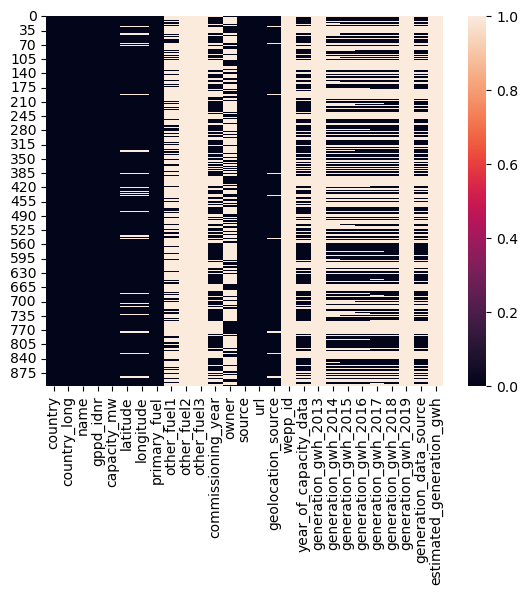

In [82]:
# Let's visualize it using heatmap
sns.heatmap(df.isnull())

And we can clearly visualize that there are lot of missing data present, and some columns fully missings.

We can observe that
 * Lot of missing data in certain columns.
 * Lot of  Non relevant data like gppd_idnr,url.
 * and many more.

At end data need to clean and we will try to do some feature engineering afterwards to modify some 

**Remove which columns they have 100% misisng values.**

Columns we are going remove are :
 
 * Name - non relevalent info
 * estimated_generation_gwh - Empty
 * wepp_id - Empty
 * other_fuel2 - 98% data missing
 * other_fuel3 - Empty
 * generation_gwh_2013 - Empty
 * generation_gwh_2019 - Empty
 * owner - More than 60 % data missing
 * year_of_capacity_data - Missing data with single unique value
 * country - non relevalent info
 * country_long - non relevalent info
 * gppd_idnr -non relevalent info
 * url - No missing value but  no use

In [83]:
df.drop(columns=['name','country','country_long','url','year_of_capacity_data',
                 'gppd_idnr','owner','other_fuel3','other_fuel2',
                 'estimated_generation_gwh','wepp_id','generation_gwh_2013',
                'generation_gwh_2019'],axis=1,inplace=True)
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [84]:
# Let's chekcing missing value in percentage from
np.round((df.shape[0] - df.notnull().sum())/df.shape[0]*100).sort_values(ascending=True)

capacity_mw                0.0
primary_fuel               0.0
source                     0.0
geolocation_source         2.0
latitude                   5.0
longitude                  5.0
commissioning_year        42.0
generation_data_source    50.0
generation_gwh_2017       51.0
generation_gwh_2018       51.0
generation_gwh_2016       52.0
generation_gwh_2015       53.0
generation_gwh_2014       56.0
other_fuel1               78.0
dtype: float64

 Handle Missing data :

 * As Geolocation source is categorical data we can impute it with mode of category.
 * longitude and latitude can be impute with mean or median of longitude and latitude. This imputation will not distrub statstical balance of data as mean will be same at the end.
*  As commissioning year for most of industrial powerplant is missing(40%) after checking correlation we will decide to keep or drop this features.
 * In generation_data_source 50% data is missing and it doesnot have any importance in our analysis. So it is better to drop this feature.
 * There are 5 Different columns of GenerationGW-Hours for year 2013 to 2017. Its dive into it further
 
      * It is important feature in for coal and hydro powerplant.
      * It is natural to have missing data in this category. As Oil,Gas based Powerplant operated in intermitant periodic way and some renewable powerplant like wind,tide are operated seasonaly.
      * Some new powerplant commission between 2013 and 2018. For these powerplant some data will definitely available.
      * We cannot do any mean or median imputation here as different powerplant have different generation capacity & Generation per year depend on runtime of powerplant.
      * We all know old powerplant normally kept off unless more demand of generation required. Reason to kept is low efficiency & high operating cost.
      * We can neglect real value data for such important feature. We will keep this feature along with missing value and perform further investigation.
 * Other_fuel1 is another feature of some importance with missing value. Lets dive into it :
 * Not every powerplant build to work with alternate fuel.
 * Idea of other fuel is totally irrelevant to renewable energy source based powerplant like solar,wind,hydro.
 * First talk about powerplant for which concept of other fuel is applicable. We can impute them based domain knowledge.
      * Alternate Fuel of Coal based powerplant mostly is Oil or cogeneration.
      * Alternate Fuel of Industrial Oil based powerplant is Gas.
      * Alternate Fuel of Industrial Gas based powerplant is Oil.
      * We cannot define any alternative fuel for nuclear powerplant as it sole based on plant design & so many option.
 * For Renewable energy source based powerplant no alternate fuel needed. As it is categorical feature we can impute these powerplant with "Not Applicable". At end we are going Encoding these labels, 'Not Applicable' will be just one other additional label in encoding. Making no alternation on final result.

### Missing value Impuatation

 ## longitude 

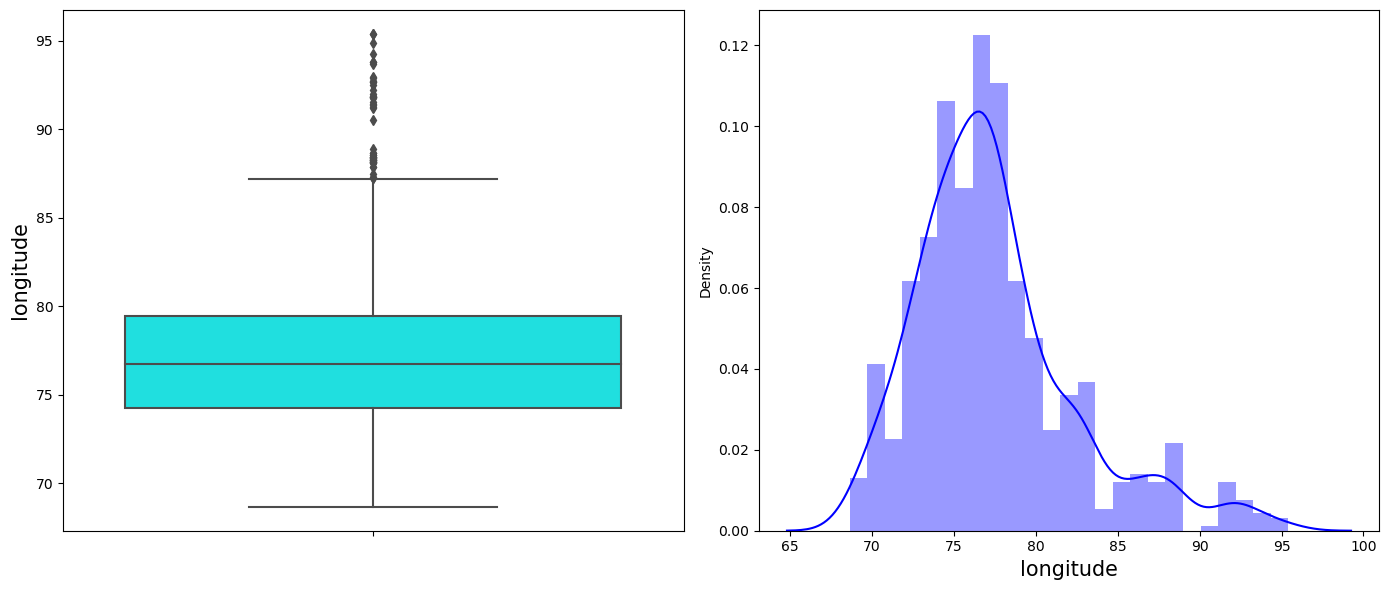

In [85]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='longitude', data=df,color='cyan')
plt.ylabel('longitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['longitude'], color='b')
plt.xlabel('longitude',fontsize=15)
plt.tight_layout()
plt.show()

* Based on presense of outliers we will impute longitude we with median.

## latitude 

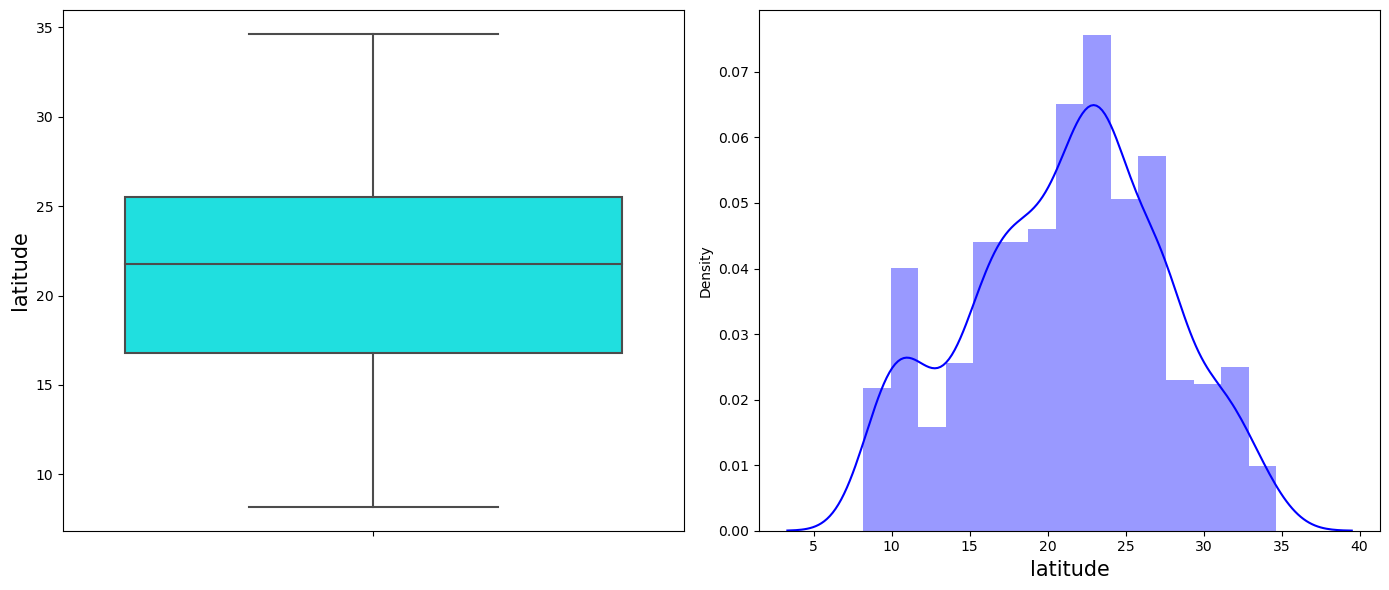

In [86]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='latitude', data=df,color='cyan')
plt.ylabel('latitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['latitude'], color='b')
plt.xlabel('latitude',fontsize=15)
plt.tight_layout()
plt.show()

* Based on absense of outliers we will impute latitude we with mean.

In [87]:
# Missing Value Imputation of geolocation with mode
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

# Missing Value Imputation of longitude with median
df['longitude'] = df['longitude'].fillna(df['longitude'].median())

# Missing Value Imputation of latitude with mean
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())

In [88]:
df.isnull().sum().sort_values(ascending=True)

capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
source                      0
geolocation_source          0
commissioning_year        380
generation_data_source    458
generation_gwh_2018       459
generation_gwh_2017       467
generation_gwh_2016       473
generation_gwh_2015       485
generation_gwh_2014       509
other_fuel1               709
dtype: int64

In [89]:
# Checking unqiue value of each columns
df.nunique().to_frame('No. of unique values')

,No. of unique values
capacity_mw,361
latitude,837
longitude,827
primary_fuel,8
other_fuel1,3
commissioning_year,73
source,191
geolocation_source,3
generation_gwh_2014,371
generation_gwh_2015,396


In [90]:
# Checking value count of each columns
for i in df.columns:
    print(df[i].value_counts())
    print('*'*50)

capacity_mw
5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: count, Length: 361, dtype: int64
**************************************************
latitude
21.197918    46
19.000400     3
24.191700     3
31.268000     2
14.235200     2
             ..
22.755400     1
27.159800     1
17.297000     1
20.877200     1
9.934400      1
Name: count, Length: 837, dtype: int64
**************************************************
longitude
76.7195    47
71.6917     4
75.8988     3
72.8983     3
71.6918     3
           ..
74.2393     1
77.0435     1
73.8254     1
74.3916     1
77.4768     1
Name: count, Length: 827, dtype: int64
**************************************************
primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: count, dtype: int64
**************************************************
other_fuel1
Oil 

In [91]:
# Speare numerical and categorical columns

# Categorical Columns
categorical_col = []

for i in df.columns:
    if df[i].dtypes == 'object':
        categorical_col.append(i)

print('Categorical Columns :',categorical_col)

# Numerical Columns
numerical_col = []

for i in df.columns:
    if df[i].dtypes != 'object':
        numerical_col.append(i)

print('\nNumerical Columns :',numerical_col)

Categorical Columns : ['primary_fuel', 'other_fuel1', 'source', 'geolocation_source', 'generation_data_source']

Numerical Columns : ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


## Discription of dataset

In [92]:
# Statistical summary of numerical columns
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,527.000000,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.427103,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.815073,17.082868,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1988.000000,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.281800,76.719500,2001.000000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.176450,79.206100,2012.000000,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


From the above description we can observe the following :-

* Bigest Powerplant has power generation capacity of 4760 MW.
 * In each Generation-GWHours columns Mean is greater than Median.
 * Powerplants are located in latitude range of 8.1689 to 34.6490 while longitudal range is 68.64 to 95.4080.
 * Oldest powerplant commission date back to 1927 and most recent powerplant is build in 2018. We will check in which timeframe most of powerplants are commission.
 * Median of capacity MW is 60 MW. This suggest that there are lot of small capacity powerplant in dataset.

### We have two different Target feature for regression and classification model. LetStart exploring both Target Feature 

## Regression Target  - Capacity

In [93]:
# Before visualing feature let find details about Smallest & Biggest Powerplant
print('Minimum Capacity of Powerplant:',df.capacity_mw.min())
print('Maximum Capacity of Powerplant:',df.capacity_mw.max())

Minimum Capacity of Powerplant: 0.0
Maximum Capacity of Powerplant: 4760.0


In [94]:
df.loc[df.capacity_mw==4760]

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
880,4760.0,24.0983,82.6719,Coal,Oil,2002.0,Central Electricity Authority,WRI,27594.0,29047.0,30015.0,35116.0,35136.0,Central Electricity Authority


Biggest powerplant in India as per database is VINDH_CHAL STPS with Power generation capacity of 4760 MW. As Name suggest it is Thermal powerplant with Coal as Primary Fuel and alternate fuel is oil. It is commission in year 2002.

In [95]:
df.loc[df.capacity_mw==0]

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
829,0.0,12.8491,77.6752,Solar,NaN,NaN,Tata BP Solar India Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN


Smallest power plant is mention as Tata BP - Electronics City Solar Panel Plant with capacity of 0 MW. This must be data entry error as If powerplant is commission it cannot have capacity of 0 MW.

**We can see there are very powerplant of capacity more than 1500 MW. Let check**

In [96]:
df.loc[df.capacity_mw >1500].shape

(39, 14)

There only 17 powerplant of capacity more than 1500 MW.

## Classification Target - primary_fuel

In [97]:
df.primary_fuel.value_counts()

primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: count, dtype: int64

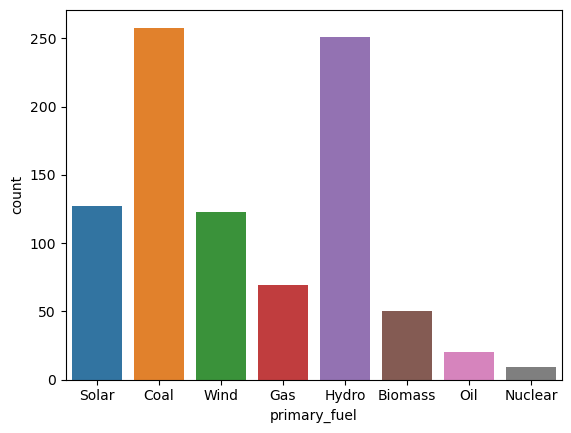

In [98]:
# Visualize the count of primary_fuel 
sns.countplot(x = 'primary_fuel',data=df)
plt.show()

Maximum Number of powerplant are coal based powerplant followed by Hydro energy based powerplants. Around 40 % Power plant are Unconventional powerplant mainly based on Non Renewable energy resorces.
There are only 9 Nuclear powerplant. Usually these powerplant build for high capacity.

In [99]:
# Let find Total Generation capacity of all powerplant
print('Total Power Generation Capacity of all Power Plants:',df['capacity_mw'].sum(),'MW')

Total Power Generation Capacity of all Power Plants: 295884.946 MW


In [100]:
# Now Let check sector wise Capacity.
df["capacity_mw"].groupby(df["primary_fuel"]).agg([sum])

,sum
primary_fuel,
Biomass,1003.260
Coal,205839.220
Gas,25172.506
Hydro,46441.770
Nuclear,8780.000
Oil,1778.840
Solar,2757.500
Wind,4111.850


Out of Total PowerGeneration Maximum comes from Coal.

Here comes another interesting observation which we already suspected. Overall Power Generation capacity of Nuclear powerplants is greater than Unconventional Energy sources based powerplant (biomass, wind,solar) combined.

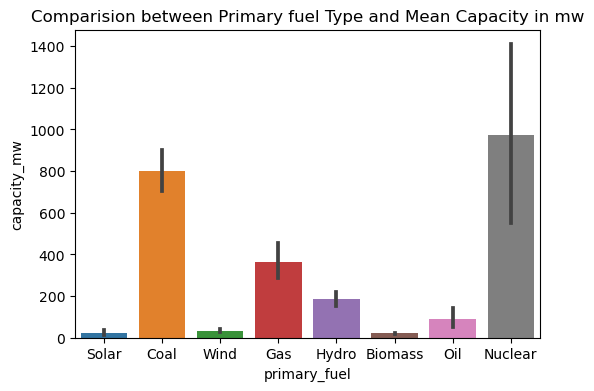

In [101]:
#Lets check the relation between primary_fuel and  Average capacity_mw
plt.figure(figsize = (6,4))
sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.title('Comparision between Primary fuel Type and Mean Capacity in mw')
plt.show()

Above result is obvious as only 9 Nuclear powerplant so its mean Capacity is higher.

## Data Visualization

### Univariate Analysis

**Firsrt we visualization the target columns**

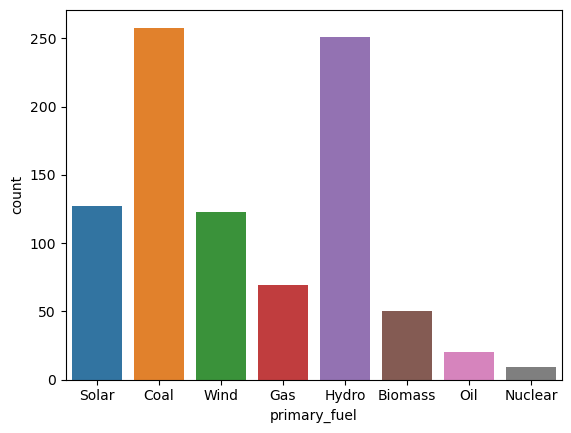

In [102]:
# Visualize the count of primary_fuel 
sns.countplot(x = 'primary_fuel',data=df)
plt.show()

Maximum Number of powerplant are coal based powerplant followed by Hydro energy based powerplants. Around 40 % Power plant are Unconventional powerplant mainly based on Non Renewable energy resorces. There are only 9 Nuclear powerplant. Usually these powerplant build for high capacity.

other_fuel1
Oil             195
Gas               2
Cogeneration      1
Name: count, dtype: int64


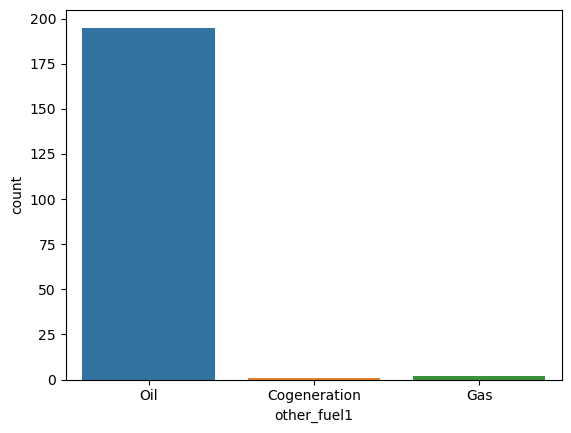

In [103]:
# Visualize the count of other_fuel1 
print(df['other_fuel1'].value_counts())

sns.countplot(x = 'other_fuel1',data=df)
plt.show()

We observe that Oil has maximum powerplant other has only 1 or 2 power plant.

geolocation_source
WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: count, dtype: int64


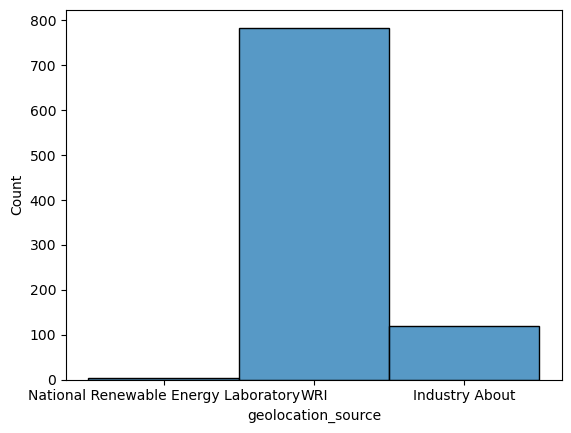

In [104]:
# Visualize the count of geolocation_source 
print(df['geolocation_source'].value_counts())

sns.histplot(x = 'geolocation_source',data=df)
plt.show()

generation_data_source
Central Electricity Authority    449
Name: count, dtype: int64


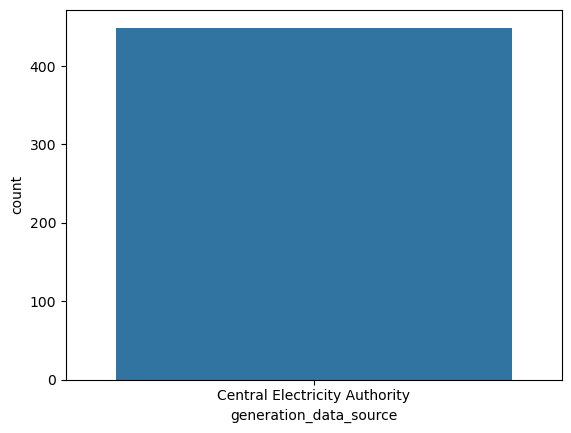

In [105]:
# Visualize the count of generation_data_source 
print(df['generation_data_source'].value_counts())

sns.countplot(x = 'generation_data_source',data=df)
plt.show()

We seems there are only one class Central Electricity Authority which has only 50% and missing 50% value is missing.

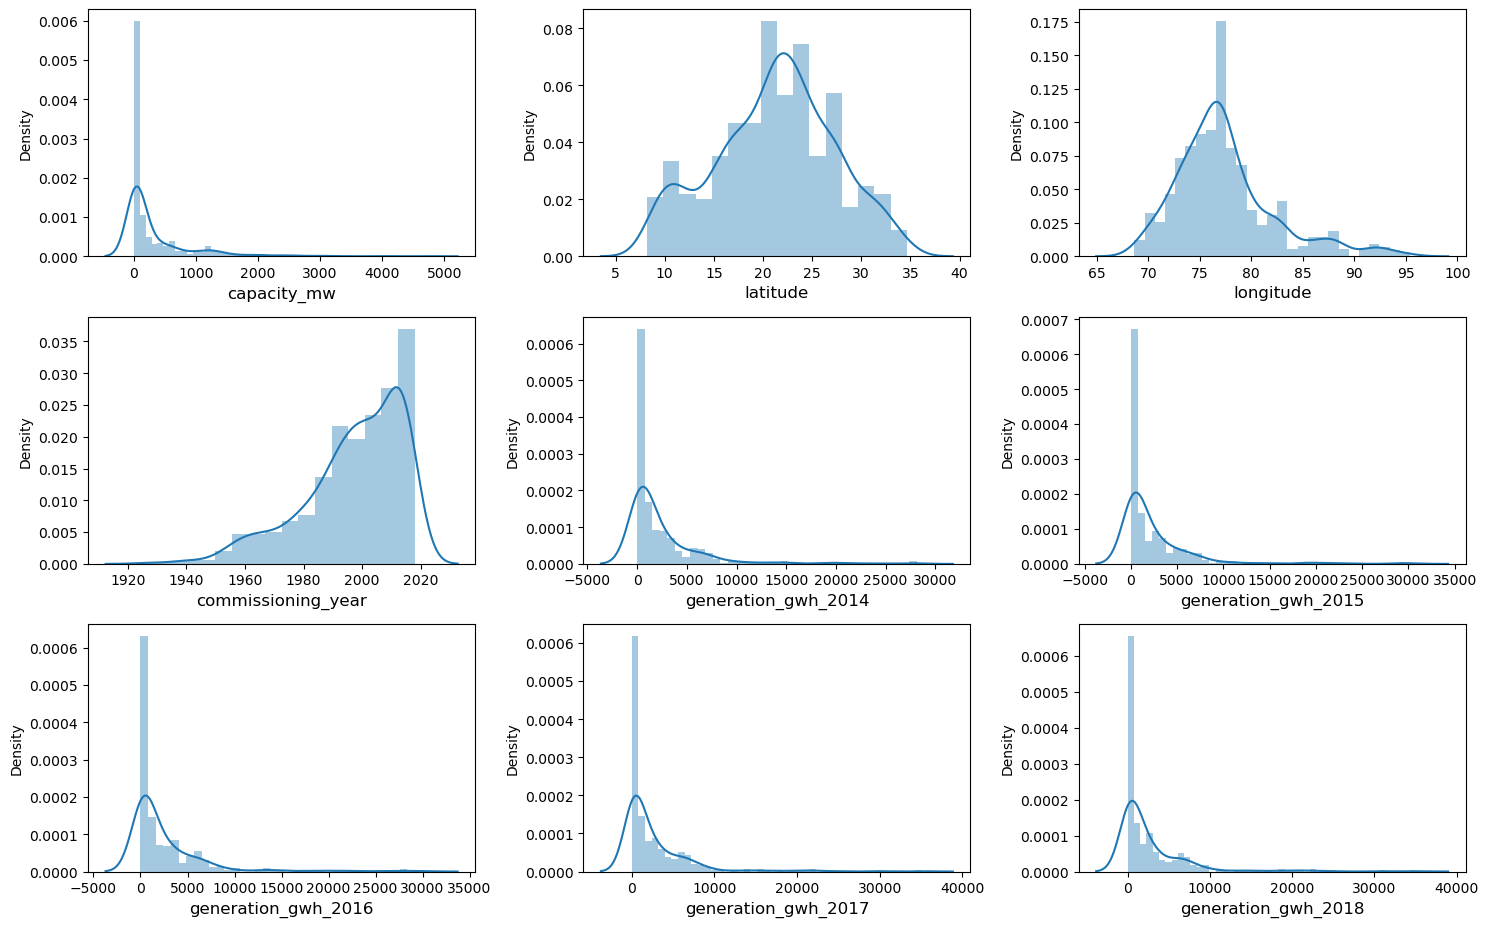

In [106]:
# Let's check how the data has been distributed in remaning column
plt.figure(figsize=(15,12),facecolor='white')
plotnumber = 1

for col in numerical_col:
    if plotnumber<=10:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(x=df[col])
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

From the above distributionplot we can observe that the data is not normally distributed in all the columns except latitude and longitude. In most of the columns the mean is greater than the median which means they are skewed to right.We will remove the skewness in all these columns except the label later.

## Baivariate Analysis

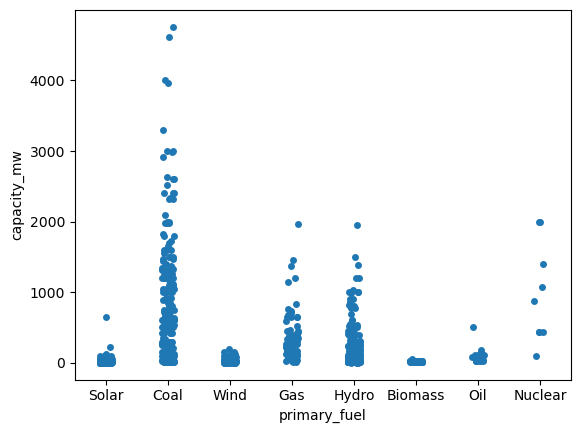

In [107]:
# Comparing capacity_mw vs primary_fuel
sns.stripplot(x='primary_fuel',y='capacity_mw',data=df)
plt.show()

We observe that Coal is high relation with capacity_mw and Solar,Wind,Biomas,Oil,Nuclear are very less relationship.

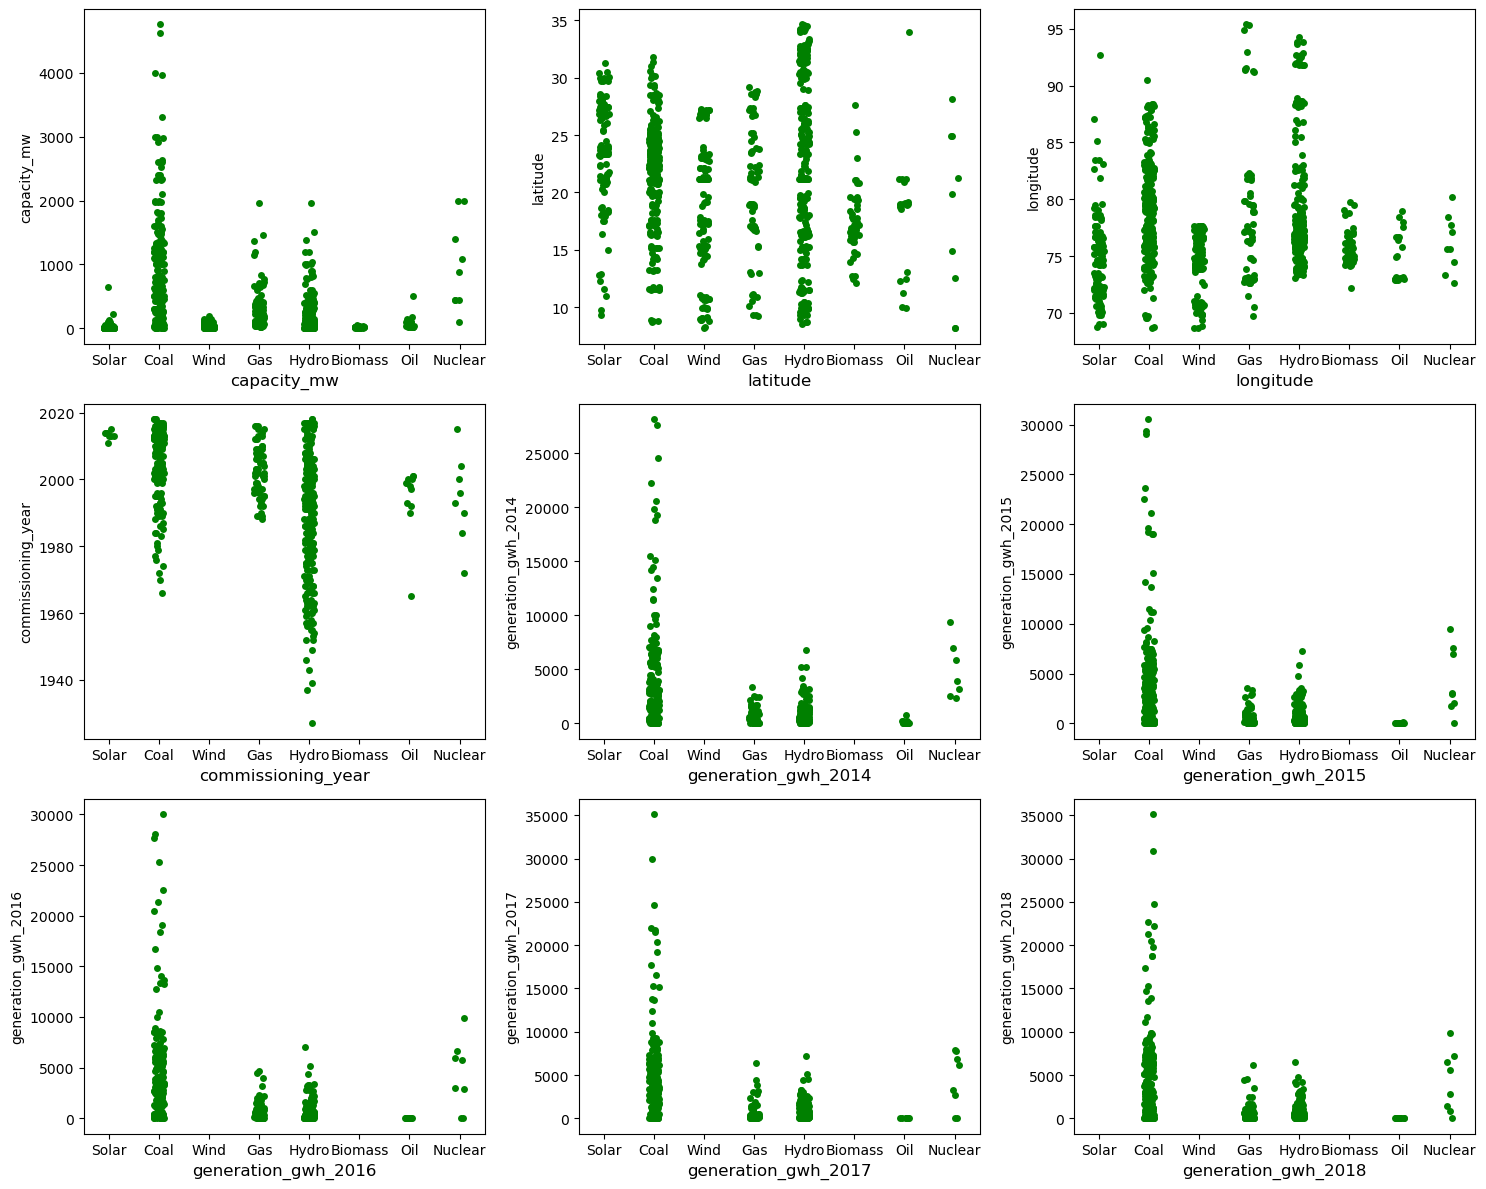

In [108]:
# Let's Comparing features vs classification target columns (primary_fuel)
plt.figure(figsize=(15,12),facecolor='white')
plotnumber = 1

for col in numerical_col:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(x='primary_fuel',y=col,data=df,color='g')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

We observe that latitude, longitude, commissioning_year has strong relationship with primary_fuel (classification target). but 4 of generation_gwh columns has less relationship with primary_fuel but they have 50% data is missing.

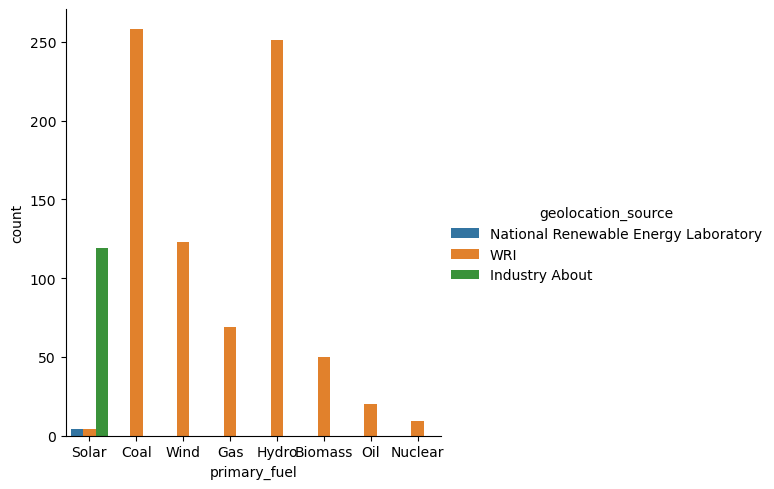

In [109]:
# Comparing primary_fuel vs geolocation_source
sns.catplot(x='primary_fuel',hue='geolocation_source',data=df,kind='count')
plt.show()

We can observe that only WRI has contribute in almost all the columns other has not contribution. 

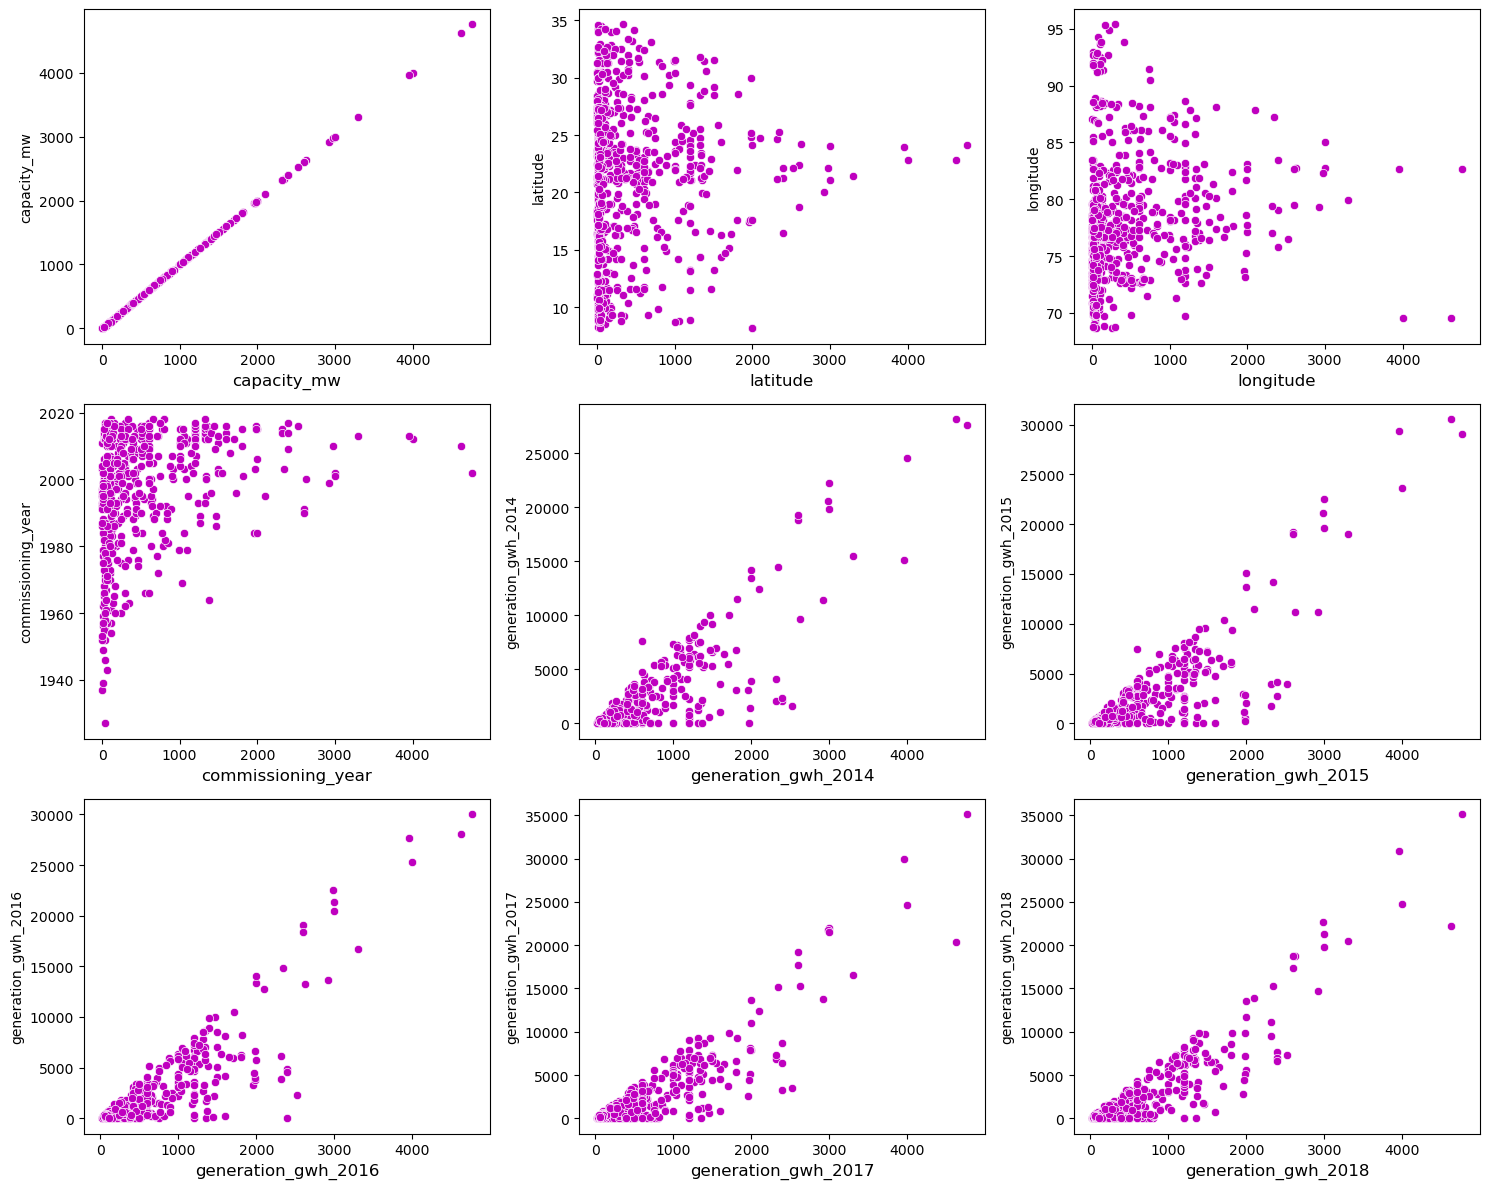

In [110]:
# Let's Comparing features vs regression target columns (capacity_mw)
plt.figure(figsize=(15,12),facecolor='white')
plotnumber = 1

for col in numerical_col:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.scatterplot(x='capacity_mw',y=col,data=df,color='m')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

We observe that latitude, longitude, commissioning_year has no relationship with capacity_mw (regression target). but all 4 generation_gwh columns has strong relationship with capacity_mw but they have 50% data is missing.

**Let's compare feature vs feature**

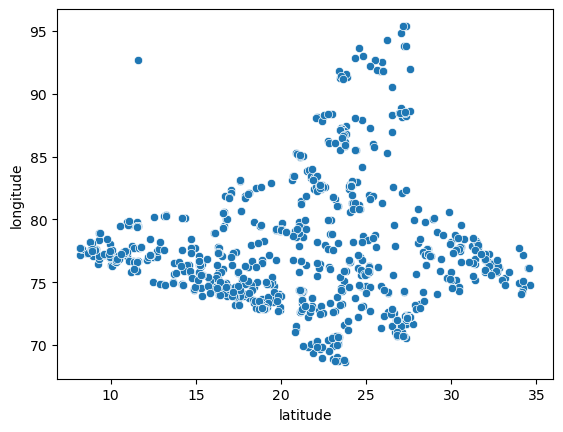

In [111]:
# Comparing latitude vs longitude
sns.scatterplot(x='latitude',y='longitude',data=df)
plt.show()

We observe that not significant linear relationship between the features.

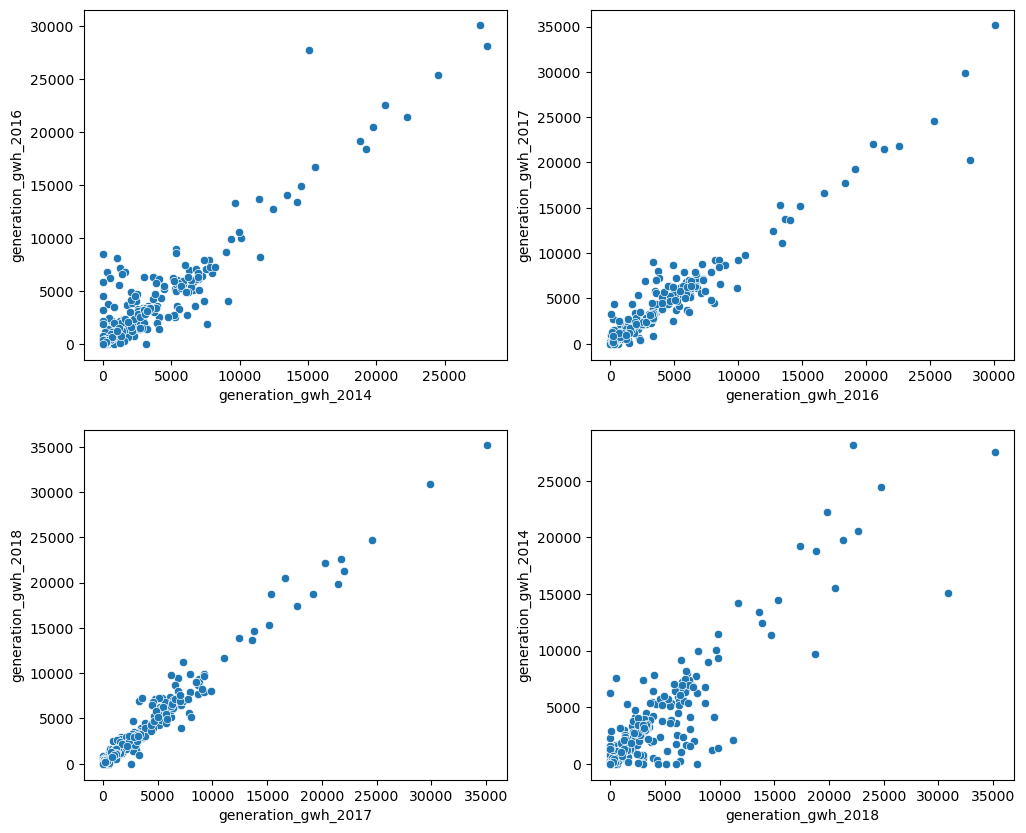

In [112]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Comparing generation_gwh_2014 vs generation_gwh_2016
sns.scatterplot(x='generation_gwh_2014',y='generation_gwh_2016',data=df,ax=axes[0,0])

# Comparing generation_gwh_2016 vs generation_gwh_2017
sns.scatterplot(x='generation_gwh_2016',y='generation_gwh_2017',data=df,ax=axes[0,1])

# Comparing generation_gwh_2017 vs generation_gwh_2018
sns.scatterplot(x='generation_gwh_2017',y='generation_gwh_2018',data=df,ax=axes[1,0])

# Comparing generation_gwh_2018 vs generation_gwh_2014
sns.scatterplot(x='generation_gwh_2018',y='generation_gwh_2014',data=df,ax=axes[1,1])
plt.show()

* There is a positive linear relationship between the capacity and the electricity generation reported for the years mentioned. 
* The plot shows the electricity generation reported for the years 2014,2015,2016,2017 have high capacity of above 1000mw. 
* Also the power generation growth is more than 5000gwh in all the years. As the electricity generation growth increases, the capacity of plant also increases.

## Multivariate Analysis

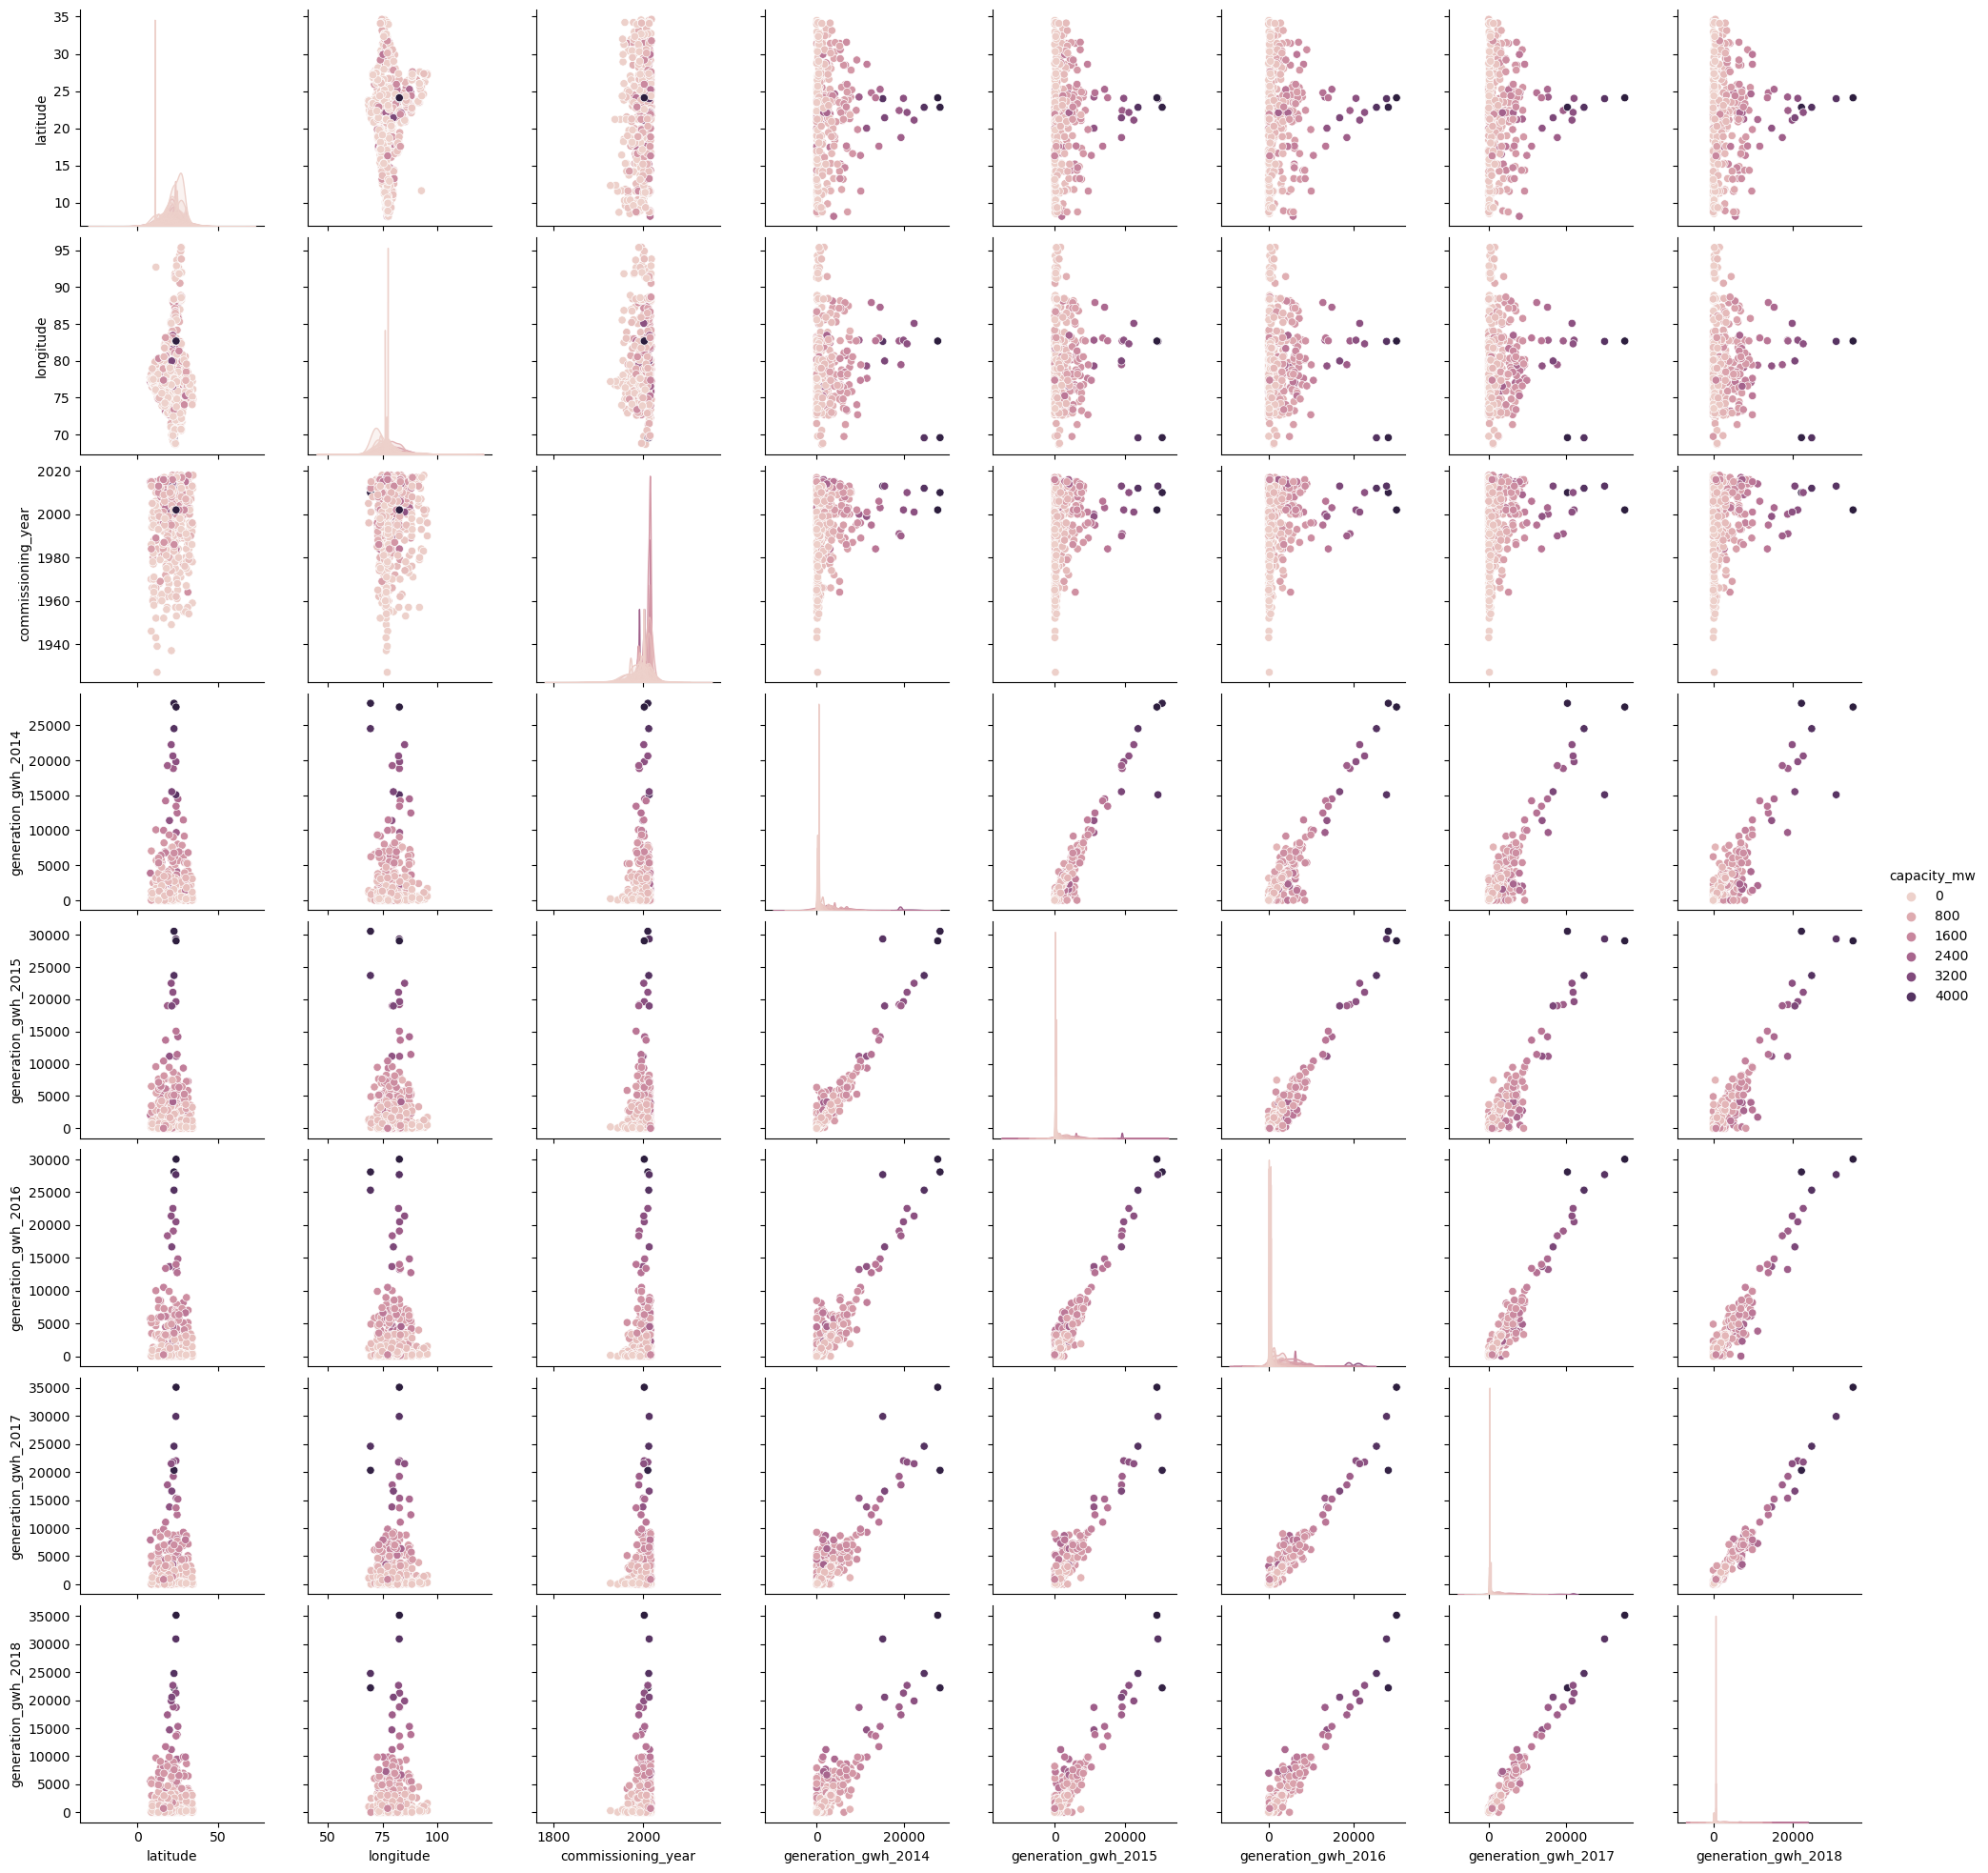

In [113]:
sns.pairplot(df,hue='capacity_mw')
plt.show()

Most of the features have strong linear relationship and correlation with each other. From the plot we can observe the outliers in some of the columns. We can see histogram on the diagonal.

## Feature Engineering

We can create a new column using commissioning year so, we can subtracting commissioning from 2018 that we find the age of the powerplant and fill misisng values with the mean of the year_ago columns.

In [114]:
# Lets extract year_ago from commissioning year by subtracting it from the year 2018
df['year_ago'] = 2018 - df['commissioning_year']

In [115]:
# Missing Value Imputation of year_ago with mean
df['year_ago'] = df['year_ago'].fillna(df['year_ago'].mean())

df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,year_ago
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,7.000000
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,20.908918
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,20.908918
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority,14.000000
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority,3.000000


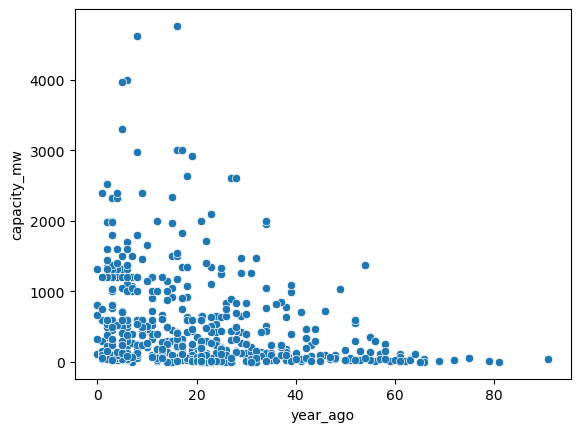

In [116]:
# Comparing capacity_mw vs year_age
sns.scatterplot(y='capacity_mw',x='year_ago',data=df)
plt.show()

There is negative linear relationship between feature and label. We can say that the capacity of older plants is very less than compared to the powerplants which are stated recently.

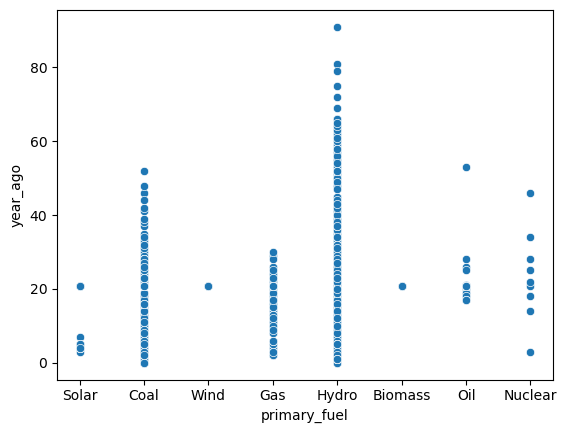

In [117]:
# Comparing primary_fuel vs year_age
sns.scatterplot(x='primary_fuel',y='year_ago',data=df)
plt.show()

There is negative linear relationship between feature and label.

### Removing columns

In [118]:
# Remove unnessary columns
df = df.drop(columns = ['other_fuel1','commissioning_year',
                        'generation_data_source'],axis=1)

df.shape

(907, 12)

In [119]:
# Remove those columns which has lot of missing data and also they have they linear relationship
df = df.drop(columns=['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016',
                      'generation_gwh_2017','generation_gwh_2018'],axis=1)

Remove those columns which has lot of missing data and also they have they strong linear relationship.

In [120]:
df.dtypes

capacity_mw           float64
latitude              float64
longitude             float64
primary_fuel           object
source                 object
geolocation_source     object
year_ago              float64
dtype: object

## Encoding categorical columns

In [121]:
# Encoding categorical columns using Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder(dtype='int')

encode = ['primary_fuel','source','geolocation_source']

df[encode] = OE.fit_transform(df[encode])

df.head()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,year_ago
0,2.5,28.1839,73.2407,6,109,1,7.000000
1,98.0,24.7663,74.6090,1,174,2,20.908918
2,39.2,21.9038,69.3732,7,21,2,20.908918
3,135.0,23.8712,91.3602,2,22,2,14.000000
4,1800.0,21.9603,82.4091,1,22,2,3.000000


## Outliers detection and removal

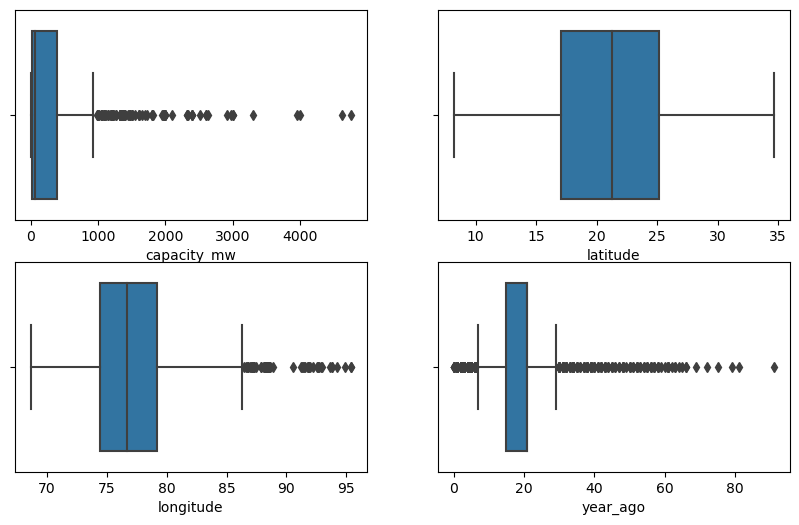

In [122]:
# Checking the outliers using boxplot

fig,axs=plt.subplots(2,2,figsize=(10,6))

sns.boxplot(x=df['capacity_mw'],ax=axs[0,0])
sns.boxplot(x=df['latitude'],ax=axs[0,1])
sns.boxplot(x=df['longitude'],ax=axs[1,0])
sns.boxplot(x=df['year_ago'],ax=axs[1,1])
plt.show()

There are outliers present in the dataset.

**We Make two prediction  1) Primary Fuel    2) capacity_mw**

**1. First build Primary Fuel classification model in which we need remove outliers in capacity_mw model.**

**2. Second build capactiy_mw regression model in which we do not remove outliers in capacity_mw because it is taget and we can remove outliers in target columns.**

So we can create two datasets.

In [123]:
df1 = df.copy()

# Primary Fuel has target columns (classification model) 

### Outliers Detection and removel

### Checking outliers using zscore method

In [124]:
# Finding the outliers using zscore mehtod (formula = x - mean/std)
from scipy.stats import zscore
    
df_features = df1[['capacity_mw','latitude','longitude','year_ago']]    
z = np.abs(zscore(df_features))            # Apply the formula and get the scaled data

df1_zscore = df[(z<3).all(axis=1)]

# Shape of old and New Dataframe
print("Old Data Frame - ",df1.shape[0])
print("New Data Frame - ",df1_zscore.shape[0])

print("\nData Loss Percentage After removing outliers with zscore method -\n ", ((df1.shape[0] - df1_zscore.shape[0])/df1.shape[0])*100)

Old Data Frame -  907
New Data Frame -  852

Data Loss Percentage After removing outliers with zscore method -
  6.063947078280044


It is affordable loss of data now we will check with IQR method

### Checking the outliers by using IQR metohd

In [125]:
# 1st quantile 
Q1 = df_features.quantile(0.25)

# 3rd quantile
Q3 = df_features.quantile(0.75)

#
IQR = Q3 - Q1

df1_iqr = df1[~((df_features<(Q1 - 1.5 * IQR)) | (df_features>(Q3 + 1.5 * IQR))).any(axis=1)]

# Shape of old and New Dataframe
print("Old Data Frame - ",df1.shape[0])
print("New Data Frame - ",df1_iqr.shape[0])

print("\nData Loss Percentage After removing outliers with zscore method -\n ", ((df1.shape[0] - df1_iqr.shape[0])/df1.shape[0])*100)

Old Data Frame -  907
New Data Frame -  563

Data Loss Percentage After removing outliers with zscore method -
  37.92723263506063


In [126]:
# reassigning the changed dataframe name to our original dataframe name
df1 = df1_zscore

df1.shape

(852, 7)

We use zscore method because its Loss less data then IQR method

#### Checking how the data has been distributed of numerical columns

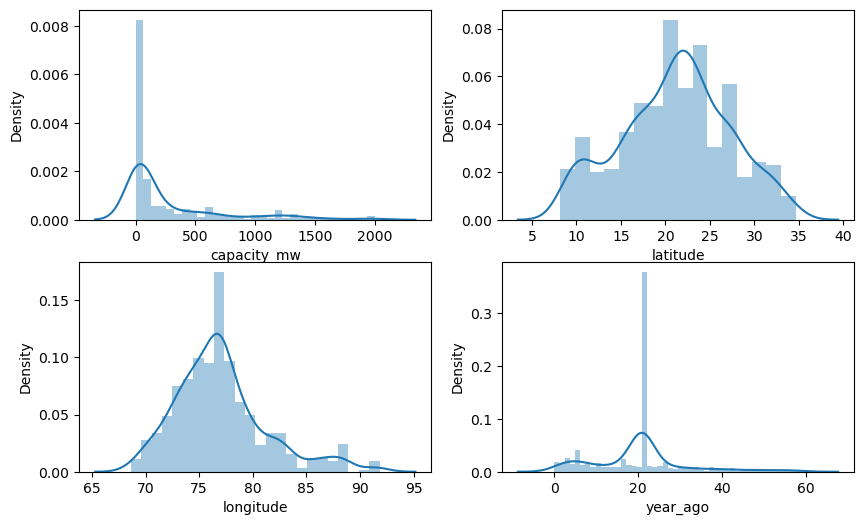

In [127]:
fig,axs=plt.subplots(2,2,figsize=(10,6))

sns.distplot(x=df1['capacity_mw'],ax=axs[0,0],axlabel='capacity_mw')
sns.distplot(x=df1['latitude'],ax=axs[0,1],axlabel='latitude')
sns.distplot(x=df1['longitude'],ax=axs[1,0],axlabel='longitude')
sns.distplot(x=df1['year_ago'],ax=axs[1,1],axlabel='year_ago')
plt.show()

The some columns has skewness in te data. So we can remove skewness.

## Checking the skewness

In [128]:
print('The skewness of capacity_mw :',df1['capacity_mw'].skew())
print('The skewness of latitude    :',df1['latitude'].skew())
print('The skewness of longitude   :',df1['longitude'].skew())
print('The skewness of year_ago    :',df1['year_ago'].skew())

The skewness of capacity_mw : 1.9923744917571156
The skewness of latitude    : -0.11155399922735892
The skewness of longitude   : 0.9405579959977769
The skewness of year_ago    : 0.8448714664155796


The colunns capacity_mw, longitude, year_ago has skewness.

### Removing skewness using yeo-johnson method

In [129]:
from sklearn.preprocessing import PowerTransformer
skew = ['capacity_mw','longitude','year_ago']

power = PowerTransformer(method='yeo-johnson')

df1[skew] = power.fit_transform(df1[skew])

### Checking after remove skewness

In [130]:
print('The skewness of capacity_mw :',df1['capacity_mw'].skew())
print('The skewness of latitude    :',df1['latitude'].skew())
print('The skewness of longitude   :',df1['longitude'].skew())
print('The skewness of year_ago    :',df1['year_ago'].skew())

The skewness of capacity_mw : 0.01577598936160839
The skewness of latitude    : -0.11155399922735892
The skewness of longitude   : 0.00043062845438096196
The skewness of year_ago    : 0.011903069933239502


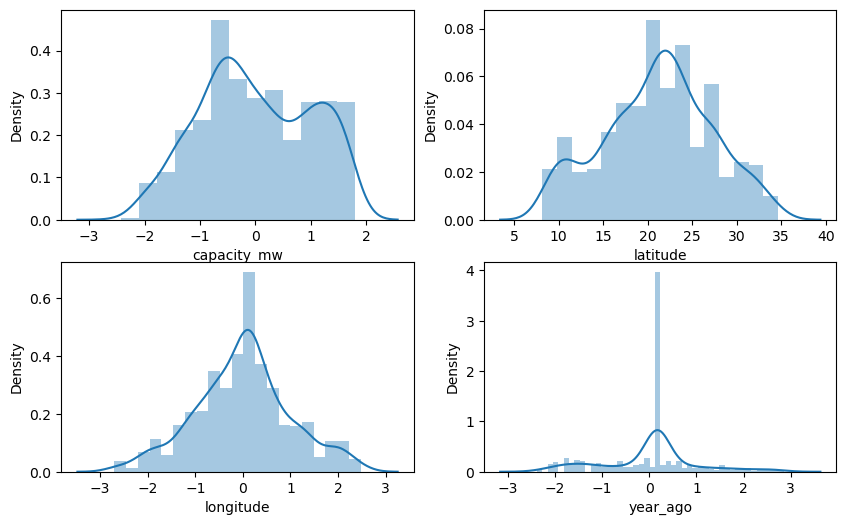

In [131]:
fig,axs=plt.subplots(2,2,figsize=(10,6))

sns.distplot(x=df1['capacity_mw'],ax=axs[0,0],axlabel='capacity_mw')
sns.distplot(x=df1['latitude'],ax=axs[0,1],axlabel='latitude')
sns.distplot(x=df1['longitude'],ax=axs[1,0],axlabel='longitude')
sns.distplot(x=df1['year_ago'],ax=axs[1,1],axlabel='year_ago')
plt.show()

This looks almsot normal and skewness is also removed.

## Correlation

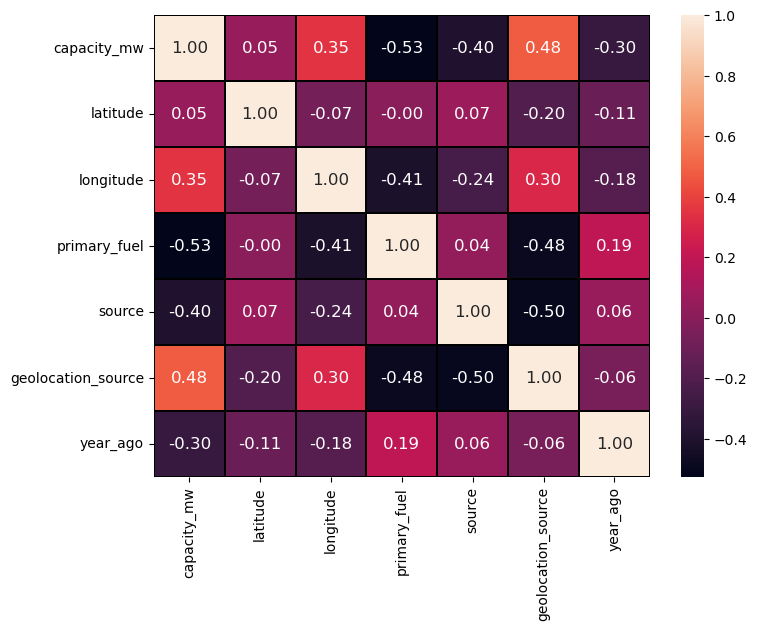

In [132]:
# Checking the correlation between features vs features and feature vs target
df_corr = df1.corr()

# Visualizing the correlation using heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_corr, annot=True, annot_kws={'size':12},linewidths=0.1,linecolor='black',fmt='0.2f')
plt.show()

This heamap contains both positive and negative correlation.

### Correlation of features with Target 

In [133]:
# Correlation of features with Target Variable Next_Tmax
df_corr['primary_fuel'].drop('primary_fuel').sort_values(ascending=False)

year_ago              0.191446
source                0.038621
latitude             -0.001270
longitude            -0.414175
geolocation_source   -0.478606
capacity_mw          -0.526004
Name: primary_fuel, dtype: float64

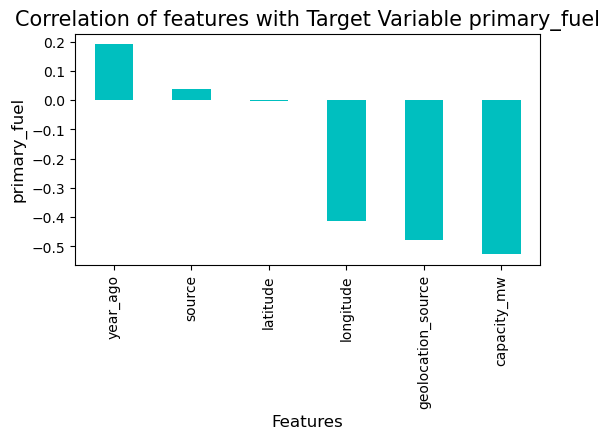

In [134]:
# visualizing correlation of feature vs target using barplot
plt.figure(figsize = (6,3))
df1.corr()['primary_fuel'].drop(['primary_fuel']).sort_values(ascending=False).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=12)
plt.ylabel('primary_fuel',fontsize=12)
plt.title('Correlation of features with Target Variable primary_fuel',fontsize = 15)
plt.show()

* The features source, latitude	 has  poorly correlated with Next_Tmax target variable.
* year_ago maximum positive correlated features with Next_Tmax target variable.
* capacity_mw  maximum negative correlated features with Next_Tmax target variable.

### Sparate feature and target

In [135]:
x = df1.drop(columns=['primary_fuel'],axis=1)
y = df1['primary_fuel']

print('Shape of X',x.shape)
print('Shape of y ',y.shape)

Shape of X (852, 6)
Shape of y  (852,)


### Feature Scaling using Standard Scalarization

In [136]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

x.shape

(852, 6)

We have scaled the data using Standard Scalrization method to overcome the issue of biasness.

### Checking Variance Inflation Factor (VIF)

In [137]:
# Find variance inflation factor of each column i.e. x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

vif

,Feature,VIF values
0,capacity_mw,1.589028
1,latitude,1.084667
2,longitude,1.190143
3,source,1.399383
4,geolocation_source,1.637593
5,year_ago,1.135426


There is no multicollinearity issue, We can now move ahead for model building.

## Modelling

In [138]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score

### Finding Best Random state

In [139]:
maxAccu = 0
maxRs = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train,y_train)
    y_pred = RFC.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRs = i
        
print("Best accuracy is ", maxAccu*100,"at random_state", maxRs)  

Best accuracy is  90.61032863849765 at random_state 129


### Creating train test split

In [140]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=maxRs)
print('The shape of x_train ',x_train.shape)
print('The shape of y_train ',y_train.shape)
print('The shape of x_test  ',x_test.shape)
print('The shape of y_test  ',y_test.shape)

The shape of x_train  (639, 6)
The shape of y_train  (639,)
The shape of x_test   (213, 6)
The shape of y_test   (213,)


### Applying all Regression Model

In [141]:
LR  = LogisticRegression()
KNN = KNeighborsClassifier()
DT  = DecisionTreeClassifier()
ET  = ExtraTreeClassifier()
RFC = RandomForestClassifier()
BC  = BaggingClassifier()
ABC = AdaBoostClassifier()
GBC = GradientBoostingClassifier()
SVM = SVC(probability=True)
XGB = xgb.XGBClassifier()

models = {'LogisticRegression':LR,'KNeighbors':KNN,'DecisionTree':DT,'ExtraTree':ET,'RandomForest':RFC,
         'Bagging':BC,'AdaBoost':ABC,'GradientBoosting':GBC,'SVC':SVM,'XGBoost':XGB}

### Applying all the models

In [142]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test, y_pred)
    print('\n\033[1m'+'Classification ML Algorithm model is',name,'\033[0m\n')

    print('\033[1m'+'Accuracy Score :'+'\033[0m', acc_score)
    
    print('\n\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(y_test, y_pred))
    
    print('\n\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(y_test, y_pred))
    
    print('****************************************************************************************')


Classification ML Algorithm model is LogisticRegression 

Accuracy Score : 0.7230046948356808

Confusion matrix : 
 [[ 6  0  0  0  0  0  0]
 [ 5 53  0  3  0  0  1]
 [ 0 10  0  2  0  0  2]
 [ 0 18  0 33  0  0  7]
 [ 0  0  0  2  0  0  0]
 [ 0  1  0  0  0 36  0]
 [ 0  0  0  8  0  0 26]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.55      1.00      0.71         6
           1       0.65      0.85      0.74        62
           2       0.00      0.00      0.00        14
           3       0.69      0.57      0.62        58
           5       0.00      0.00      0.00         2
           6       1.00      0.97      0.99        37
           7       0.72      0.76      0.74        34

    accuracy                           0.72       213
   macro avg       0.51      0.59      0.54       213
weighted avg       0.68      0.72      0.69       213

****************************************************************************************



### Cross Validation

In [143]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test, y_pred)
    
    score = cross_val_score(model, x, y, cv =5)

    print('\n\033[1m'+'Cross Validation Score', name, ':'+'\033[0m\n')
    print("Score          :" ,score)
    print("Mean Score     :",score.mean())
    print('Accuracy Score :',acc_score)
        
    final = acc_score - score.mean()
    print('\nDifferent between Accuracy vs Cross Val Score: ',final)
    
    print('\n***********************************************************************************')


Cross Validation Score LogisticRegression :

Score          : [0.62573099 0.67251462 0.64705882 0.64117647 0.65882353]
Mean Score     : 0.6490608875128998
Accuracy Score : 0.7230046948356808

Different between Accuracy vs Cross Val Score:  0.07394380732278094

***********************************************************************************

Cross Validation Score KNeighbors :

Score          : [0.76608187 0.75438596 0.73529412 0.71764706 0.78235294]
Mean Score     : 0.7511523907808738
Accuracy Score : 0.8215962441314554

Different between Accuracy vs Cross Val Score:  0.07044385335058156

***********************************************************************************

Cross Validation Score DecisionTree :

Score          : [0.78362573 0.70760234 0.85294118 0.75294118 0.72941176]
Mean Score     : 0.7653044375644995
Accuracy Score : 0.8591549295774648

Different between Accuracy vs Cross Val Score:  0.09385049201296525

************************************************************

## GradientBoosting is out best model.

Score          : [0.81871345 0.84210526 0.85294118 0.84117647 0.81176471]
Mean Score     : 0.8333402132782938
Accuracy Score : 0.8826291079812206

Different between Accuracy vs Cross Val Score:  0.049288894702926855

**We can see that GradientBoosting  gives less error between accuracy score and CrossValidation.**

### Hyper paramter tuning : GridSearchCV

**Tune the parameter with GradientBoosting  model**

In [144]:
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate': [0.01,0.02],
                  'subsample'    : [0.9,0.5],
                  'n_estimators' : [100,250],
                  'max_depth'    : [4,8,12]} 

GCV = GridSearchCV(estimator = GBC, param_grid=param_grid,n_jobs = -1)

GCV.fit(x_train,y_train)

print('Best estimator : ',GCV.best_estimator_)
print('\n')
print('Best score : ',GCV.best_score_)

Best estimator :  GradientBoostingClassifier(learning_rate=0.02, max_depth=4, n_estimators=250,
                           subsample=0.9)


Best score :  0.8200541338582678


### Final Model

In [147]:
model = GCV.best_estimator_
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print('\033[1m'+' Final Model :' +'\033[0m')
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('\nConfusion matrix :\n',confusion_matrix(y_test, y_pred))
print('\nClassification report :\n',classification_report(y_test, y_pred))

 Final Model :
Accuracy Score 0.8732394366197183

Confusion matrix :
 [[ 6  0  0  0  0  0  0]
 [ 4 55  2  1  0  0  0]
 [ 0  3  7  2  2  0  0]
 [ 0 10  1 47  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  0  0 37  0]
 [ 0  0  0  0  0  0 34]]

Classification report :
               precision    recall  f1-score   support

           0       0.60      1.00      0.75         6
           1       0.81      0.89      0.85        62
           2       0.70      0.50      0.58        14
           3       0.90      0.81      0.85        58
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00        37
           7       1.00      1.00      1.00        34

    accuracy                           0.87       213
   macro avg       0.72      0.74      0.72       213
weighted avg       0.88      0.87      0.87       213



### Saving Model

In [150]:
import pickle
filename = 'Primary_Fuel_Global_Power_Plant.pkl'
pickle.dump(model, open(filename, 'wb'))  # Saved model

### Predicting the saved model

In [151]:
import pickle
loaded_model = pickle.load(open('Primary_Fuel_Global_Power_Plant.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

87.32394366197182


In [152]:
conculsion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conculsion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212
Predicted,1,6,7,7,1,1,6,3,6,3,6,2,6,1,2,7,7,6,1,3,7,6,1,5,6,3,6,7,3,1,1,3,1,3,1,7,1,1,7,1,3,1,7,7,7,3,7,1,1,3,3,6,3,1,1,7,3,7,6,1,3,3,6,6,7,7,7,3,1,7,7,1,6,3,6,7,0,7,6,3,3,2,1,1,3,2,1,3,2,7,3,1,0,3,3,3,3,6,0,1,6,1,1,2,3,1,1,7,1,7,1,1,1,1,3,1,3,1,0,1,2,3,0,3,1,1,3,1,3,1,6,6,1,3,3,1,1,7,2,3,1,1,7,0,6,1,3,6,6,1,3,7,3,1,1,3,3,1,1,3,6,6,0,6,5,3,6,1,3,3,1,1,7,1,6,3,1,6,0,0,6,6,6,7,3,1,1,1,1,1,7,3,6,6,2,6,7,1,1,0,2,3,7,1,3,7,6,6,3,1,7,3,1
Original,1,6,7,7,1,1,6,3,6,3,6,2,6,1,1,7,7,6,1,3,7,6,3,2,6,3,6,7,3,1,1,3,1,3,1,7,1,1,7,1,3,2,7,7,7,3,7,1,2,3,3,6,3,3,1,7,3,7,6,1,3,2,6,6,7,7,7,3,3,7,7,1,6,3,6,7,0,7,6,3,3,2,1,1,3,2,1,3,2,7,3,1,1,1,3,3,3,6,0,1,6,1,1,3,3,1,3,7,1,7,1,1,1,1,2,1,3,1,1,1,2,3,1,3,1,1,3,2,3,1,6,6,1,3,3,3,3,7,1,3,1,1,7,0,6,1,3,6,6,3,3,7,3,1,1,3,5,1,1,3,6,6,1,6,2,3,6,1,3,3,1,1,7,3,6,3,1,6,0,0,6,6,6,7,5,1,1,1,1,1,7,3,6,6,2,6,7,3,3,0,2,3,7,1,3,7,6,6,3,1,7,3,1


# capacity_mw has target columns (Regression model)

In [153]:
df2 = df.copy()

### Outliers Detection and removel

### Checking outliers using zscore method

In [154]:
# Finding the outliers using zscore mehtod (formula = x - mean/std)
from scipy.stats import zscore
    
df_features = df2[['capacity_mw','latitude','longitude','year_ago']]    
z = np.abs(zscore(df_features))            # Apply the formula and get the scaled data

df2_zscore = df[(z<3).all(axis=1)]

# Shape of old and New Dataframe
print("Old Data Frame - ",df2.shape[0])
print("New Data Frame - ",df1_zscore.shape[0])

print("\nData Loss Percentage After removing outliers with zscore method -\n ", ((df2.shape[0] - df2_zscore.shape[0])/df2.shape[0])*100)

Old Data Frame -  907
New Data Frame -  852

Data Loss Percentage After removing outliers with zscore method -
  6.063947078280044


It is affordable loss of data now we will check with IQR method.

### Checking the outliers by using IQR metohd

In [155]:
# 1st quantile 
Q1 = df_features.quantile(0.25)

# 3rd quantile
Q3 = df_features.quantile(0.75)

#
IQR = Q3 - Q1

df2_iqr = df2[~((df_features<(Q1 - 1.5 * IQR)) | (df_features>(Q3 + 1.5 * IQR))).any(axis=1)]

# Shape of old and New Dataframe
print("Old Data Frame - ",df2.shape[0])
print("New Data Frame - ",df2_iqr.shape[0])

print("\nData Loss Percentage After removing outliers with zscore method -\n ", ((df2.shape[0] - df2_iqr.shape[0])/df2.shape[0])*100)

Old Data Frame -  907
New Data Frame -  563

Data Loss Percentage After removing outliers with zscore method -
  37.92723263506063


In [156]:
# reassigning the changed dataframe name to our original dataframe name
df2 = df2_zscore

df2.shape

(852, 7)

We use zscore method because its Loss less data then IQR method

#### Checking how the data has been distributed of numerical columns

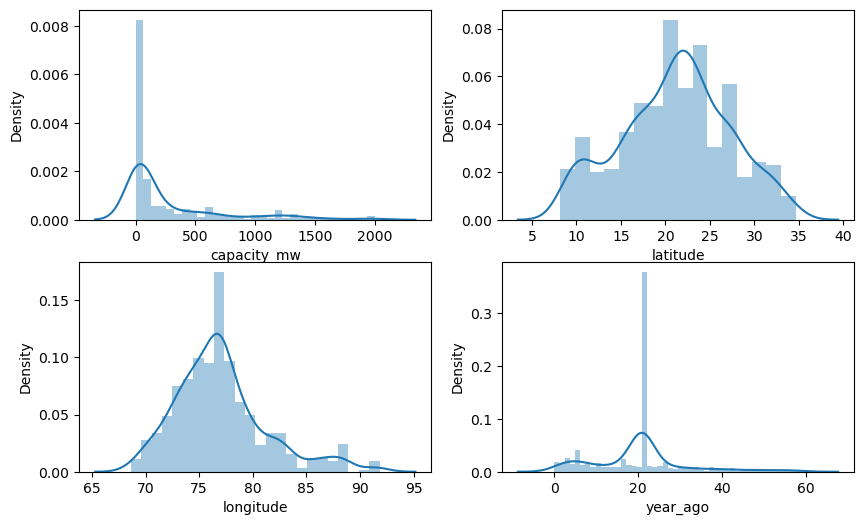

In [157]:
# Check how the data has been distributed
fig,axs=plt.subplots(2,2,figsize=(10,6))

sns.distplot(x=df2['capacity_mw'],ax=axs[0,0],axlabel='capacity_mw')
sns.distplot(x=df2['latitude'],ax=axs[0,1],axlabel='latitude')
sns.distplot(x=df2['longitude'],ax=axs[1,0],axlabel='longitude')
sns.distplot(x=df2['year_ago'],ax=axs[1,1],axlabel='year_ago')
plt.show()

The some columns has skewness in te data. So we can remove skewness.

## Checking the skewness

In [160]:
print('The skewness of latitude    :',df2['latitude'].skew())
print('The skewness of longitude   :',df2['longitude'].skew())
print('The skewness of year_ago    :',df2['year_ago'].skew())

The skewness of latitude    : -0.11155399922735892
The skewness of longitude   : 0.9405579959977769
The skewness of year_ago    : 0.8448714664155796


The colunns capacity_mw, longitude, year_ago has skewness.

### Removing skewness using yeo-johnson method

In [161]:
from sklearn.preprocessing import PowerTransformer
skew = ['longitude','year_ago']

power = PowerTransformer(method='yeo-johnson')

df2[skew] = power.fit_transform(df2[skew])

### Checking after remove skewness

In [163]:
print('The skewness of longitude   :',df2['longitude'].skew())
print('The skewness of year_ago    :',df2['year_ago'].skew())

The skewness of longitude   : 0.00043062845438096196
The skewness of year_ago    : 0.011903069933239502


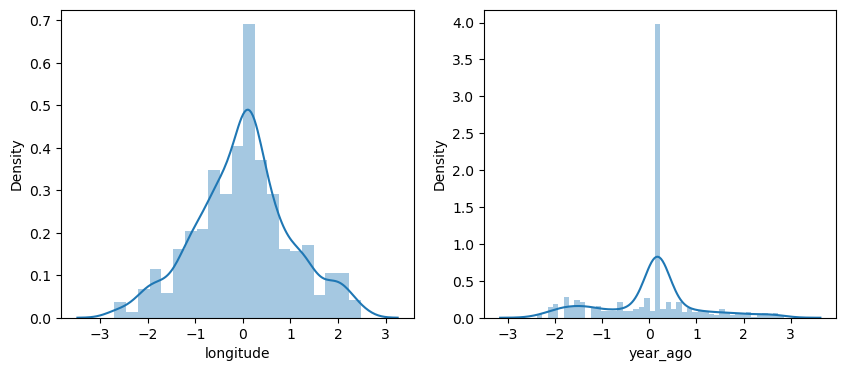

In [173]:
# Check how the data has been distributed
fig,axs=plt.subplots(1,2,figsize=(10,4))

sns.distplot(x=df2['longitude'],ax=axs[0],axlabel='longitude')
sns.distplot(x=df2['year_ago'],ax=axs[1],axlabel='year_ago')
plt.show()

This looks almsot normal and skewness is also removed.

## Correlation

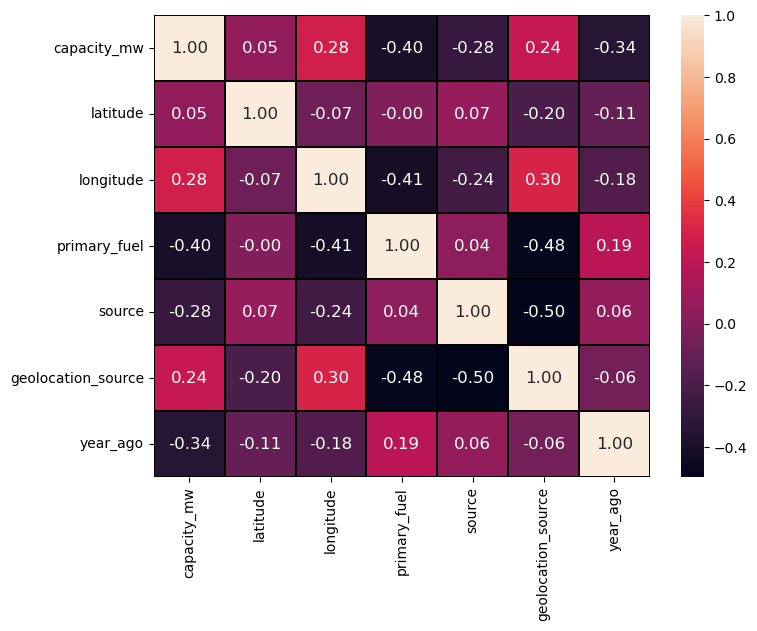

In [174]:
# Checking the correlation between features vs features and feature vs target
df_corr = df2.corr()

# Visualizing the correlation using heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_corr, annot=True, annot_kws={'size':12},linewidths=0.1,linecolor='black',fmt='0.2f')
plt.show()

This heamap contains both positive and negative correlation.

### Correlation of features with Target

In [175]:
# Correlation of features with Target Variable Next_Tmax
df_corr['capacity_mw'].drop('capacity_mw').sort_values(ascending=False)

longitude             0.275249
geolocation_source    0.238682
latitude              0.046231
source               -0.280314
year_ago             -0.340180
primary_fuel         -0.403169
Name: capacity_mw, dtype: float64

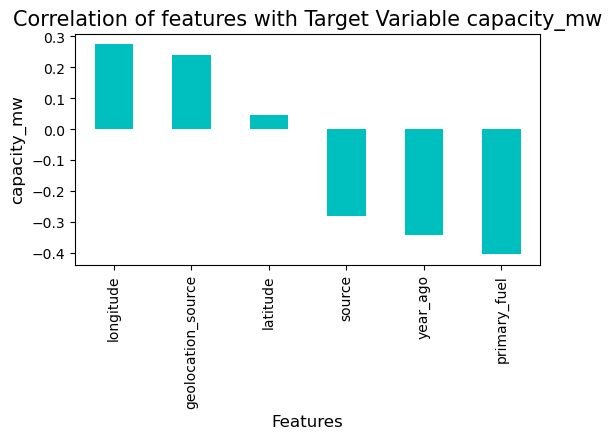

In [176]:
# visualizing correlation of feature vs target using barplot
plt.figure(figsize = (6,3))
df2.corr()['capacity_mw'].drop(['capacity_mw']).sort_values(ascending=False).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=12)
plt.ylabel('capacity_mw',fontsize=12)
plt.title('Correlation of features with Target Variable capacity_mw',fontsize = 15)
plt.show()

* The features latitude	has poorly correlated with Next_Tmin target variable.
* longitude maximum positive correlated features with Next_Tmin target variable.
* primary_fuel maximum negative correlated features with Next_Tmin target variable.

### Sparate feature and target

In [177]:
x = df1.drop(columns=['capacity_mw'],axis=1)
y = df1['capacity_mw']

print('Shape of X',x.shape)
print('Shape of y ',y.shape)

Shape of X (852, 6)
Shape of y  (852,)


### Feature Scaling using Standard Scalarization

In [178]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

x.shape

(852, 6)

We have scaled the data using Standard Scalrization method to overcome the issue of biasness.

### Checking Variance Inflation Factor (VIF)

In [179]:
# Find variance inflation factor of each column i.e. x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

vif

,Feature,VIF values
0,latitude,1.079482
1,longitude,1.308441
2,primary_fuel,1.675707
3,source,1.510915
4,geolocation_source,1.960361
5,year_ago,1.071590


There is no multicollinearity issue, We can now move ahead for model building.

## Modelling

In [180]:
# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Model selection
from sklearn.model_selection import train_test_split, cross_val_score

### Finding Best Random state

In [181]:
# Find the best ranom state 
maxAcc = 0
maxRS  = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    y_pred = LR.predict(x_test)
    acc = r2_score(y_test,y_pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
        
print('The  Best accuracy score is',maxAcc,' on best random state is',maxRS)

The  Best accuracy score is 0.5406438489816859  on best random state is 129


###  Creating train test split

In [182]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=maxRS)
print('The shape of x_train ',x_train.shape)
print('The shape of y_train ',y_train.shape)
print('The shape of x_test  ',x_test.shape)
print('The shape of y_test  ',y_test.shape)

The shape of x_train  (639, 6)
The shape of y_train  (639,)
The shape of x_test   (213, 6)
The shape of y_test   (213,)


### Applying all Regression Model

In [186]:
LR  = LinearRegression()
L1 = Lasso()
L2 = Ridge(alpha=0.01)
KNN = KNeighborsRegressor()
DT  = DecisionTreeRegressor()
ET  = ExtraTreeRegressor()
RFR = RandomForestRegressor()
BC  = BaggingRegressor()
ABR = AdaBoostRegressor()
GBR = GradientBoostingRegressor()
SVM = SVR()
XGB = XGBRegressor()

models = {'LinearRegression':LR,'KNeighbors':KNN,'DecisionTree':DT,'ExtraTree':ET,'RandomForest':RFR,
         'Bagging':BC,'AdaBoost':ABR,'GradientBoosting':GBR,'SVR':SVM,'XGBoost':XGB,'Lasso':L1,'Ridge':L2}

### Applying all the models 

In [187]:
for name,model in models.items():
    model.fit(x_train,y_train)
    model.score(x_train,y_train)
    y_pred = model.predict(x_test)
    print('\033[1m'+'Error of',name,'\033[0m')
    print('Mean absolute error      :',mean_absolute_error(y_test,y_pred))
    print('Mean squared error       :',mean_squared_error(y_test,y_pred))
    print('Root mean squared error  :',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('\n')
    print('\033[1m'+'R2 Score '+'\033[0m')
    print(r2_score(y_test,y_pred))
    print('*************************************************************************\n')

Error of LinearRegression 
Mean absolute error      : 0.5928379000593149
Mean squared error       : 0.5067255493791853
Root mean squared error  : 0.7118465771352598


R2 Score 
0.5406438489816859
*************************************************************************

Error of KNeighbors 
Mean absolute error      : 0.49905654837331287
Mean squared error       : 0.3897195440116291
Root mean squared error  : 0.6242752149586184


R2 Score 
0.6467119727175376
*************************************************************************

Error of DecisionTree 
Mean absolute error      : 0.5315382526505141
Mean squared error       : 0.5047410148211198
Root mean squared error  : 0.7104512754729347


R2 Score 
0.5424428665312702
*************************************************************************

Error of ExtraTree 
Mean absolute error      : 0.5541472246437233
Mean squared error       : 0.5467273251582719
Root mean squared error  : 0.7394101197294177


R2 Score 
0.5043814939883546
*******

## Cross Validation

In [188]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy_score = r2_score(y_test,y_pred)
    score = cross_val_score(model,x,y,cv = 5)
    print('\033[1m',name,'\033[0m\n')
    print('R2 Score                       :',accuracy_score)
    print('Cross Validation Score         :',score)
    print('Mean of Cross Validation Score :',score.mean())
    
    final = accuracy_score - score.mean()
    print('\nDifferent between R2 Score vs Cross Validaton Score :',final)
    print('********************************************************************************\n')

 LinearRegression 

R2 Score                       : 0.5406438489816859
Cross Validation Score         : [0.44423453 0.51109046 0.40432147 0.45463266 0.45078407]
Mean of Cross Validation Score : 0.45301263808447984

Different between R2 Score vs Cross Validaton Score : 0.0876312108972061
********************************************************************************

 KNeighbors 

R2 Score                       : 0.6467119727175376
Cross Validation Score         : [0.50410166 0.58414859 0.53971806 0.53976644 0.60687774]
Mean of Cross Validation Score : 0.5549224993650232

Different between R2 Score vs Cross Validaton Score : 0.0917894733525143
********************************************************************************

 DecisionTree 

R2 Score                       : 0.500569527200509
Cross Validation Score         : [0.43983058 0.3800305  0.39486642 0.34954938 0.38448612]
Mean of Cross Validation Score : 0.3897525990918633

Different between R2 Score vs Cross Validaton Score : 0

GradientBoosting is out best model.

* R2 Score                       : 0.6732016472967874

* Cross Validation Score         : [0.60612604 0.6161332  0.61473841 0.65922386 0.58031819]

* Mean of Cross Validation Score : 0.6153079390846299

* Different between R2 Score vs Cross Validaton Score : 0.05789370821215756
    
**We can see that GradientBoosting gives less error between accuracy score and CrossValidation.**

### Hyper paramter tuning : GridSearchCV

#### Tune the parameter with GradientBoosting model

In [189]:
from sklearn.model_selection import GridSearchCV

param_grid ={'learning_rate': [0.01,0.02,0.03],
             'subsample'    : [0.9,0.5,0.1],
             'n_estimators' : [250,500],
             'max_depth'    : [4,8,12]}

GCV = GridSearchCV(estimator = GBR, param_grid=param_grid, n_jobs = -1, verbose=5)

GCV.fit(x_train,y_train)

print('Best estimator : ',GCV.best_estimator_)
print('\n')
print('Best score : ',GCV.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best estimator :  GradientBoostingRegressor(learning_rate=0.01, max_depth=12, n_estimators=500,
                          subsample=0.1)


Best score :  0.6131799158192595


## Final Model

In [191]:
Final_mod = GCV.best_estimator_
Final_mod.fit(x_train,y_train)
y_pred=Final_mod.predict(x_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.4415639772014361
Mean squared error : 0.3405396511001799
Root Mean Squared Error: 0.5835577530117991


 R2 Score of Final Model :
0.691294461883465




 Actual Values Vs Predicted Value plot :


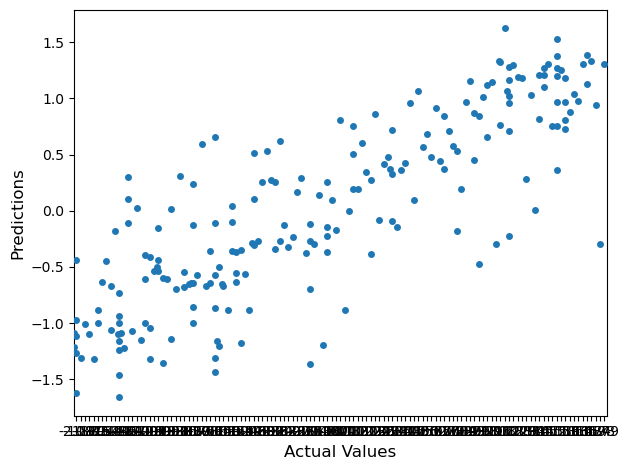

In [192]:
y_pred=Final_mod.predict(x_test)
sns.swarmplot(x = y_test.round(2),y = y_pred)
print('\033[1m'+' Actual Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('Actual Values' , fontsize=12)
plt.ylabel('Predictions', fontsize=12)
plt.tight_layout()

### Saving Model

In [195]:
import pickle
filename = 'capacity_mw_Global_Power_Plant.pkl'
pickle.dump(Final_mod, open(filename, 'wb'))  # Saved model

### Predicting the saved model

In [196]:
import pickle
loaded_model = pickle.load(open('capacity_mw_Global_Power_Plant.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

69.1294461883465


In [197]:
conculsion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conculsion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212
Predicted,-0.271626,-1.011364,-1.354509,-0.565967,1.382171,-0.318612,-1.323331,-0.299440,-1.047713,0.194243,-0.142692,0.861494,-0.932662,0.757226,1.180172,-0.540902,-0.234410,-0.886430,1.130578,0.657630,-0.53525,-1.089483,0.196566,1.063925,-0.730245,0.363704,-0.667160,-0.605180,0.004197,0.710424,0.810143,-0.396712,-0.220789,0.257563,1.274103,-0.879772,1.533308,0.964051,-1.180684,0.814451,0.096126,0.875097,-0.695917,-0.653869,-0.879772,0.311192,-0.129440,-0.342982,1.038345,0.719203,-0.265543,-0.860107,0.476686,0.579490,0.943197,-0.347354,0.443623,-0.385357,-1.099776,1.250066,0.428163,0.711475,-1.626178,-1.263146,-0.637107,-1.196616,-0.679723,0.107497,0.969424,-0.378387,-1.207845,1.062746,-1.062541,0.238868,-0.997206,-1.139937,-0.668626,-0.437557,-1.436579,-0.604484,1.014742,0.910588,0.041461,0.765438,0.532398,1.151430,1.309573,0.278486,1.297358,-0.879772,0.021482,1.030336,-0.361020,1.623038,0.593095,0.301095,0.480204,-0.968644,-0.595615,1.100562,-1.001936,1.308725,1.207857,0.163454,0.874715,-0.298835,0.340958,-0.362168,-0.102316,-1.312748,1.148539,1.330869,0.724245,0.756982,0.963708,0.655038,-0.447795,0.955920,-0.153478,-0.090854,0.254837,0.517903,-0.288002,0.293050,0.502520,0.981285,-0.300192,0.846122,-0.477559,0.750320,-0.642688,-1.100470,1.323917,0.285789,-0.122178,0.366902,0.606598,-0.499806,1.334770,0.448178,1.384322,1.272621,-0.111423,-0.571772,-1.241374,0.096795,-1.067973,-1.211438,-1.221225,-0.298117,-0.574845,-0.539766,0.017284,1.282052,1.192318,-0.183083,-0.082379,1.203668,1.162200,-0.224059,-1.115770,-0.120841,-0.641578,-1.461270,0.415566,0.806890,-1.000401,-0.407648,0.565566,0.617753,0.369661,0.254422,-0.638215,0.191982,-1.364198,0.105249,1.178875,-0.862893,-0.649960,-0.692121,-1.086987,-1.149255,-1.659929,-0.670918,-0.366497,-0.109870,-0.177535,-0.006172,1.211899,1.309000,-1.306869,0.846095,-0.265971,-1.322432,0.966872,-1.002806,-0.363510,0.375649,0.276458,-0.641309,0.680460,0.328650,-0.503764,1.018182,-0.146118,-0.438682,-1.159825,-1.155881,0.142175,1.118517,-0.551491,0.533620,-0.172205
Original,-0.394311,-1.809600,-0.947925,-0.470149,1.533718,-0.283733,-1.748928,1.062637,-1.007454,0.175711,0.352138,0.237750,-1.359226,0.175711,1.293430,-0.814598,-0.273958,-1.597701,1.679381,-0.638338,-0.99452,-1.359226,0.842507,0.546738,-1.359226,0.409703,-0.586912,-1.062395,1.360705,1.178351,1.589718,-1.062395,1.178351,-0.043228,1.465741,-0.574773,1.533718,1.593485,-0.502854,1.440846,-0.022004,1.601378,-0.137665,-0.798169,0.077402,-0.848988,-0.296566,-0.335440,1.632441,0.330268,-0.320158,-0.792799,0.620945,0.780562,1.738708,-0.504965,0.699241,0.232401,-1.768456,1.582096,0.427817,0.765872,-2.011335,-2.011335,-1.515211,-0.078169,-0.805411,-0.419040,1.533718,-0.146338,-0.612025,1.178351,-1.443100,-0.792799,-1.062395,-0.911490,-0.710196,-2.011335,-0.638338,-0.929410,0.983082,0.653215,-0.517801,1.083853,0.816867,0.933294,1.646796,-0.355168,1.218114,-0.463248,-1.123291,1.326594,-0.695057,1.123794,-0.727342,-1.269230,0.283600,-2.011335,-0.947925,1.465741,-1.597701,1.507633,1.440846,-0.262998,0.959730,-0.134449,0.216022,-0.522147,-0.517801,-1.877348,1.002322,1.694898,1.585921,1.520847,0.470877,0.993091,-1.466143,1.178351,-0.981877,0.330268,-0.375638,-0.419040,-0.419040,-0.199109,0.175711,1.636585,-0.419040,0.